In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()
from IPython.display import display

In [214]:
spdf = pd.read_csv("Sparkling.csv")

# Data definition

In [215]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [216]:
spdf.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

# Data description


In [217]:
spdf.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [218]:
spdf.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

## Organize dataset

In [219]:
Date = pd.date_range(start="1980-01-01", periods=187, freq="M")
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [220]:
spdf["Date"] = Date

In [221]:
spdf.drop("YearMonth", axis=1, inplace=True)

In [222]:
spdf.set_index("Date", inplace=True)

In [223]:
spdf.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [224]:
spdf.index.freq = "M"

# Time series plot

In [225]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

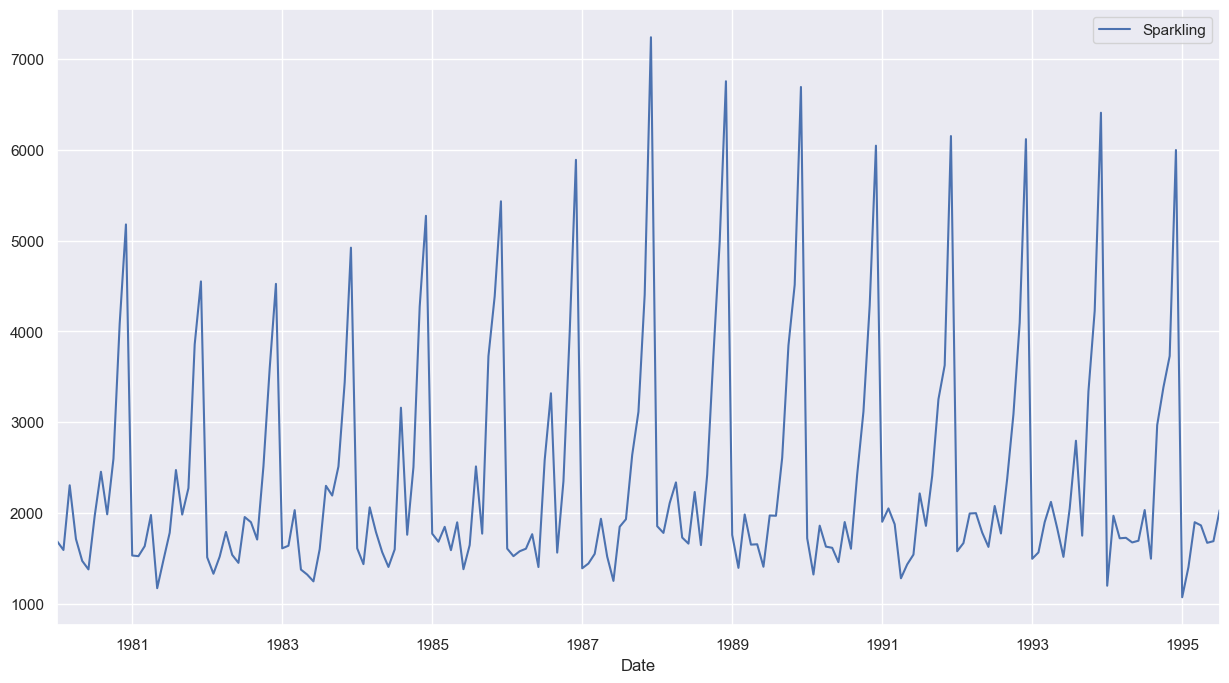

In [226]:
spdf.plot()
plt.show()

# Box plot

## Yearly box plot

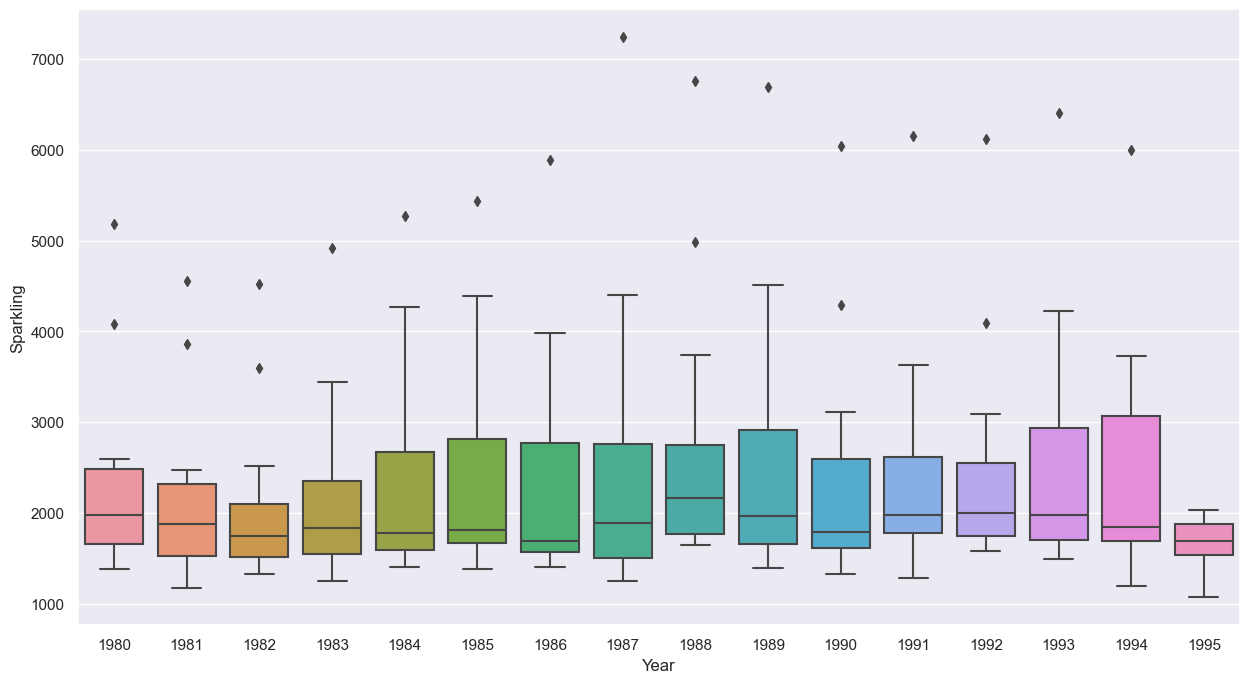

In [227]:
sns.boxplot(x = spdf.index.year, y = spdf["Sparkling"])
plt.xlabel('Year')
plt.show()

## Monthly box plot

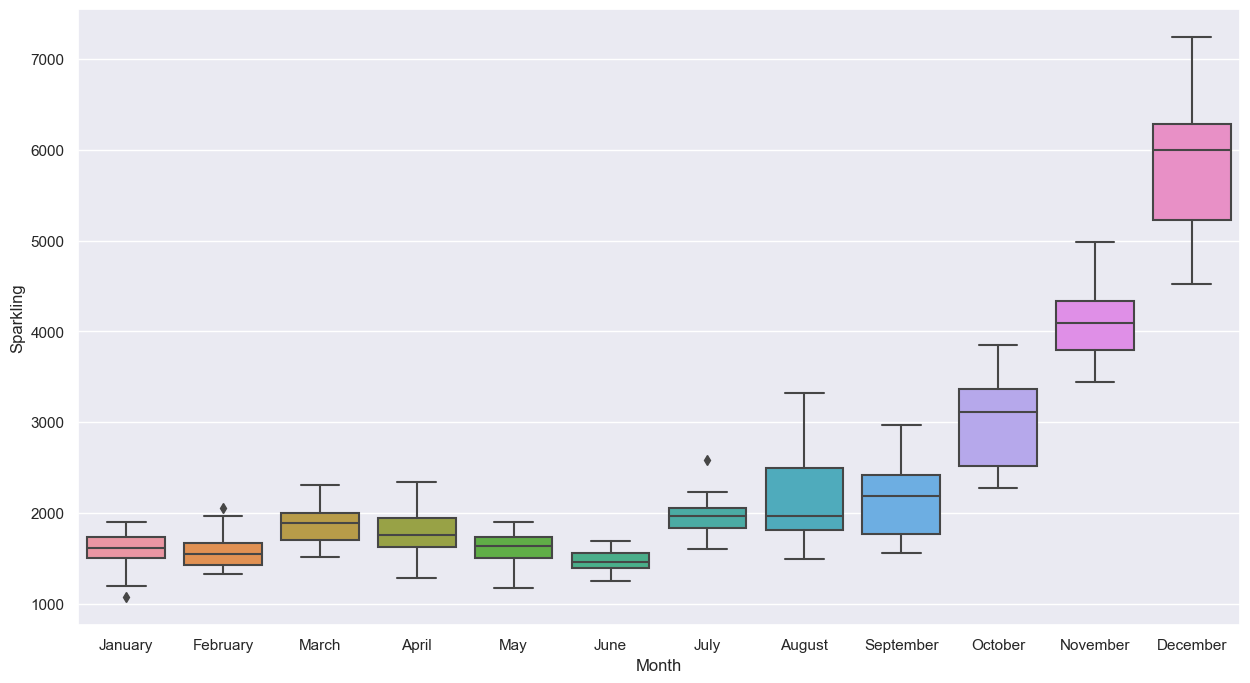

In [228]:
sns.boxplot(x = spdf.index.month_name(), y = spdf["Sparkling"])
plt.xlabel('Month')
plt.show()

## Monthly sales for Sparkling Wine across years for each month

In [229]:
from statsmodels.graphics.tsaplots import month_plot

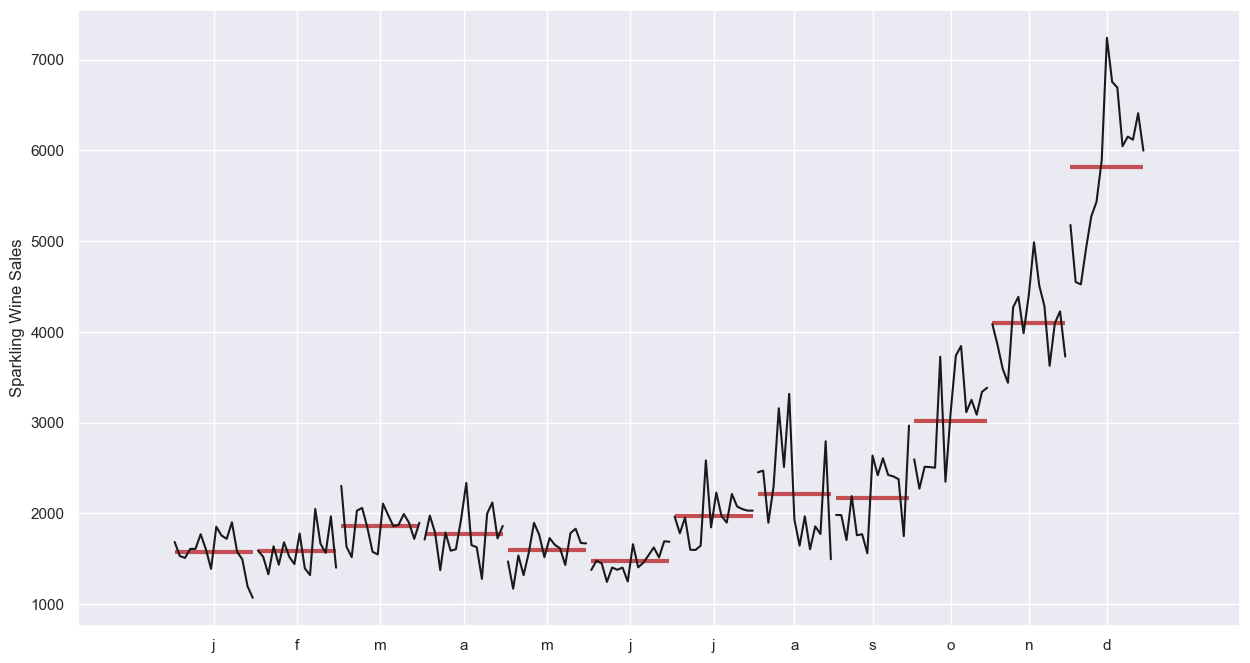

In [230]:
month_plot(spdf, ylabel="Sparkling Wine Sales")

# Decompose the Time Series

In [231]:
from statsmodels.tsa.seasonal import seasonal_decompose

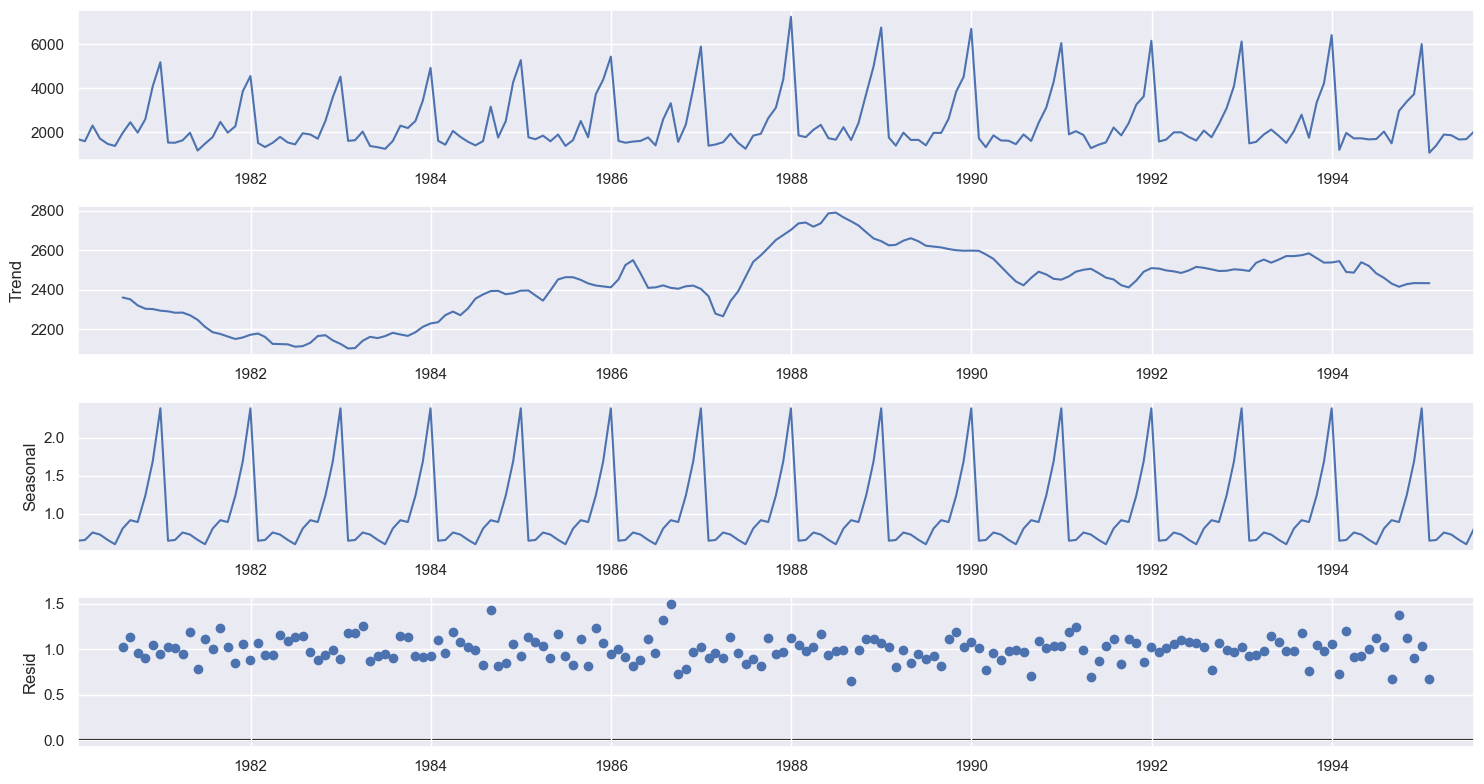

In [232]:
decomposition = seasonal_decompose(spdf, model="multiplicative")
decomposition.plot()

## Trend, Seasonality and Residual

In [233]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", "\n", trend.head(12), "\n")
print("Seasonality", "\n", seasonality.head(12), "\n")
print("Residual", "\n", residual.head(12), "\n")

Trend 
 Date
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Freq: M

# Train test split & plot

In [234]:
train = spdf[0:int(len(spdf)*0.7)]
test = spdf[int(len(spdf)*0.7):]

In [235]:
train.shape, test.shape

((130, 1), (57, 1))

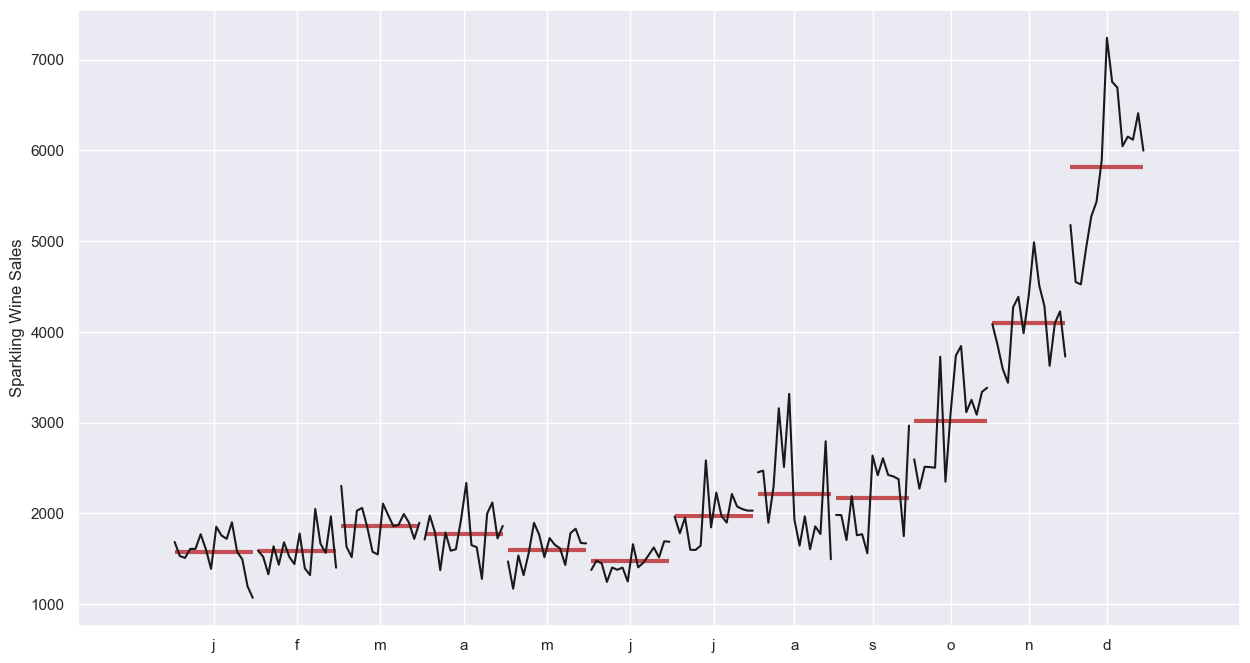

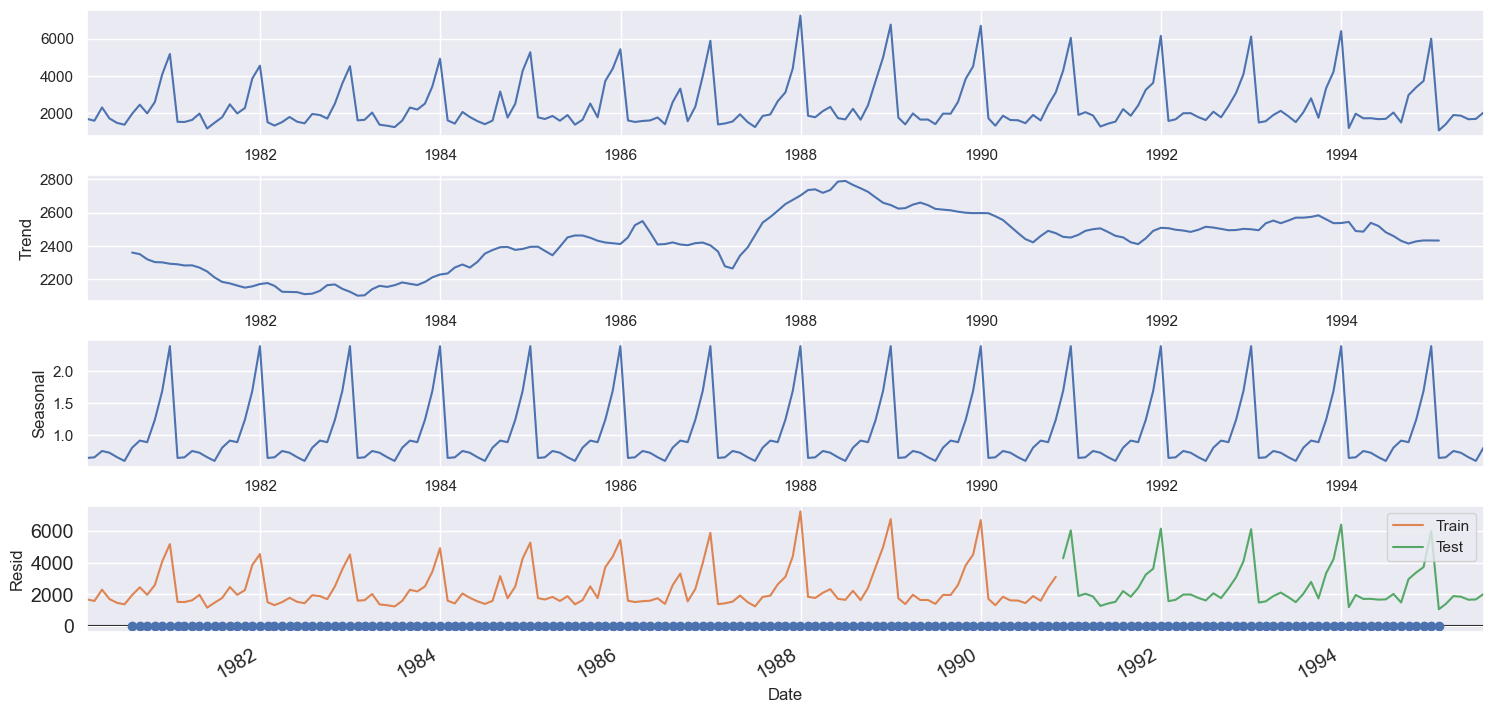

In [236]:
train["Sparkling"].plot(legend = True, label = "Train", fontsize = 14)
test["Sparkling"].plot(legend = True, label = "Test", fontsize = 14)
plt.show()

# Linear regression model – RMSE

We are going to regress the "Sparkling" variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [237]:
train_time  = [i + 1 for i in range(len(train))]
test_time  = [i + 131 for i in range(len(test))]
print("Training time instance", "\n", train_time)
print("Test time instance", "\n", test_time)
print(len(train), len(test))

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
130 57


In [238]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [239]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [240]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

Sparkling  time
Date                       
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5

Sparkling  time
Date                       
1990-06-30       1457   126
1990-07-31       1899   127
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130

In [241]:
from sklearn.linear_model import LinearRegression

In [242]:
lr = LinearRegression()

In [243]:
lr.fit(LinearRegression_train[["time"]], LinearRegression_train["Sparkling"])

LinearRegression()

In [244]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [245]:
LinearRegression_test.head(12)

Sparkling  time    RegOnTime
Date                                    
1990-11-30       4286   131  2630.431485
1990-12-31       6047   132  2634.540715
1991-01-31       1902   133  2638.649945
1991-02-28       2049   134  2642.759175
1991-03-31       1874   135  2646.868405
1991-04-30       1279   136  2650.977635
1991-05-31       1432   137  2655.086864
1991-06-30       1540   138  2659.196094
1991-07-31       2214   139  2663.305324
1991-08-31       1857   140  2667.414554
1991-09-30       2408   141  2671.523784
1991-10-31       3252   142  2675.633014

Plot

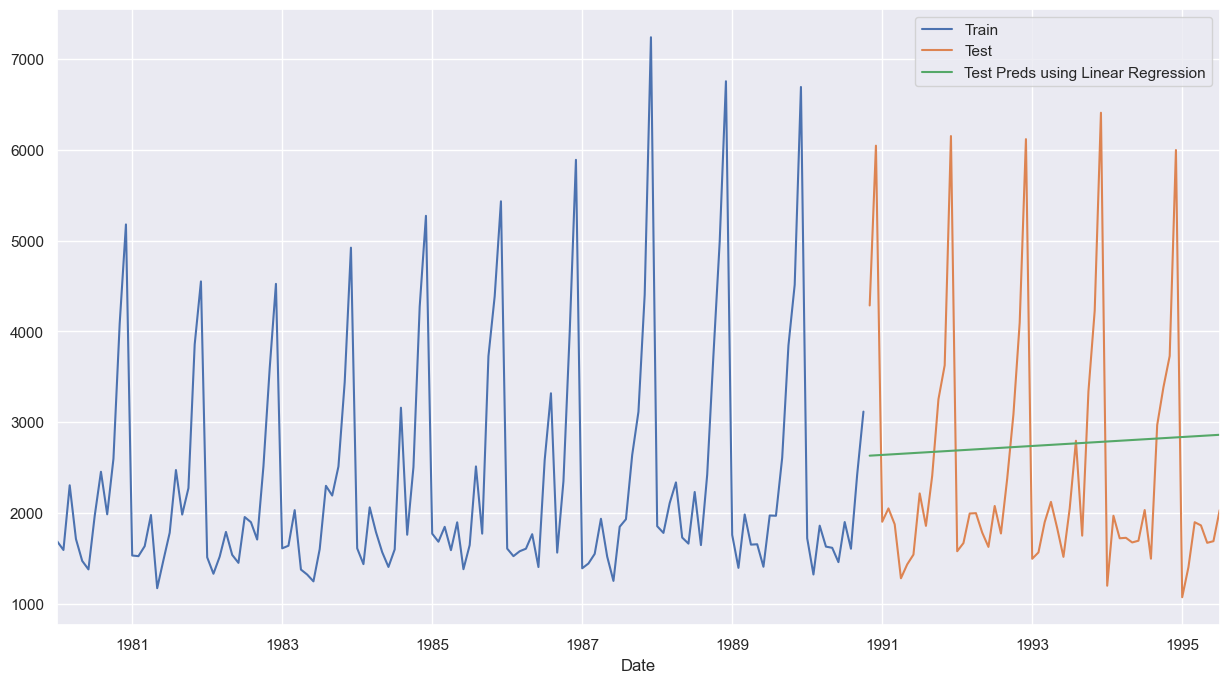

In [246]:
train["Sparkling"].plot(legend = True, label = 'Train')
test["Sparkling"].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')
plt.show()

Accuracy Metrics

In [247]:
from statsmodels.tools.eval_measures import rmse

Model Evaluation

In [248]:
rmse_model1_test = rmse(test["Sparkling"], test_predictions_model1)
rmse_model1_test

1392.438304864264

In [249]:
resultsDf = pd.DataFrame({"Test RMSE": [rmse_model1_test]}, index = ["RegressionOnTime"])
resultsDf

Test RMSE
RegressionOnTime  1392.438305

# Naïve model – RMSE

In [250]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [251]:
NaiveModel_test["naive"] = train["Sparkling"][len(train["Sparkling"])-1]

In [252]:
NaiveModel_test["naive"].head()

Date
1990-11-30    3116
1990-12-31    3116
1991-01-31    3116
1991-02-28    3116
1991-03-31    3116
Freq: M, Name: naive, dtype: int64

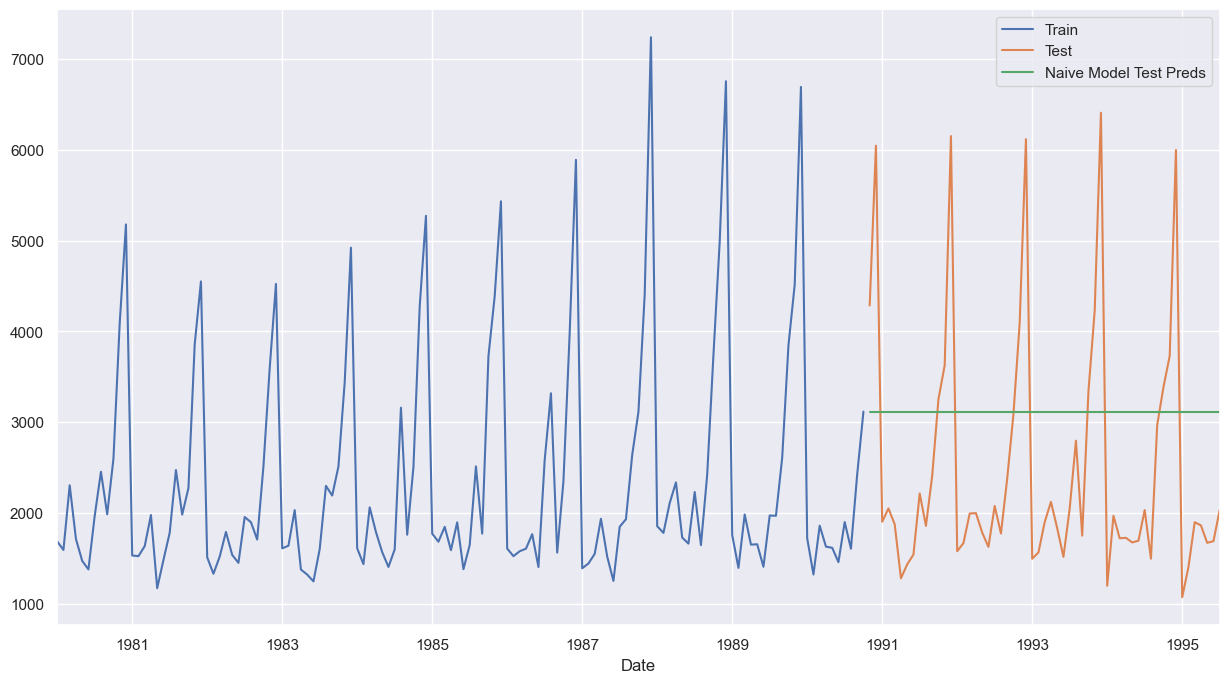

In [253]:
train["Sparkling"].plot(legend = True, label = "Train")
test["Sparkling"].plot(legend = True, label = "Test")
NaiveModel_test["naive"].plot(legend = True, label = "Naive Model Test Preds")
plt.show()

Model Evaluation

In [254]:
rmse_model2_test = rmse(test["Sparkling"], NaiveModel_test["naive"])
print("RMSE for Naive Bayes",rmse_model2_test)


resultsDf_2 = pd.DataFrame({"Test RMSE": [rmse_model2_test]}, index=["NaiveModel"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
display(resultsDf)

RMSE for Naive Bayes 1496.4446285498805


Test RMSE
RegressionOnTime  1392.438305
NaiveModel        1496.444629

# Simple average model – RMSE

In [255]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [256]:
SimpleAverage_test["mean_Sparkling"] = train["Sparkling"].mean()
SimpleAverage_test.head()

Sparkling  mean_Sparkling
Date                                 
1990-11-30       4286     2361.276923
1990-12-31       6047     2361.276923
1991-01-31       1902     2361.276923
1991-02-28       2049     2361.276923
1991-03-31       1874     2361.276923

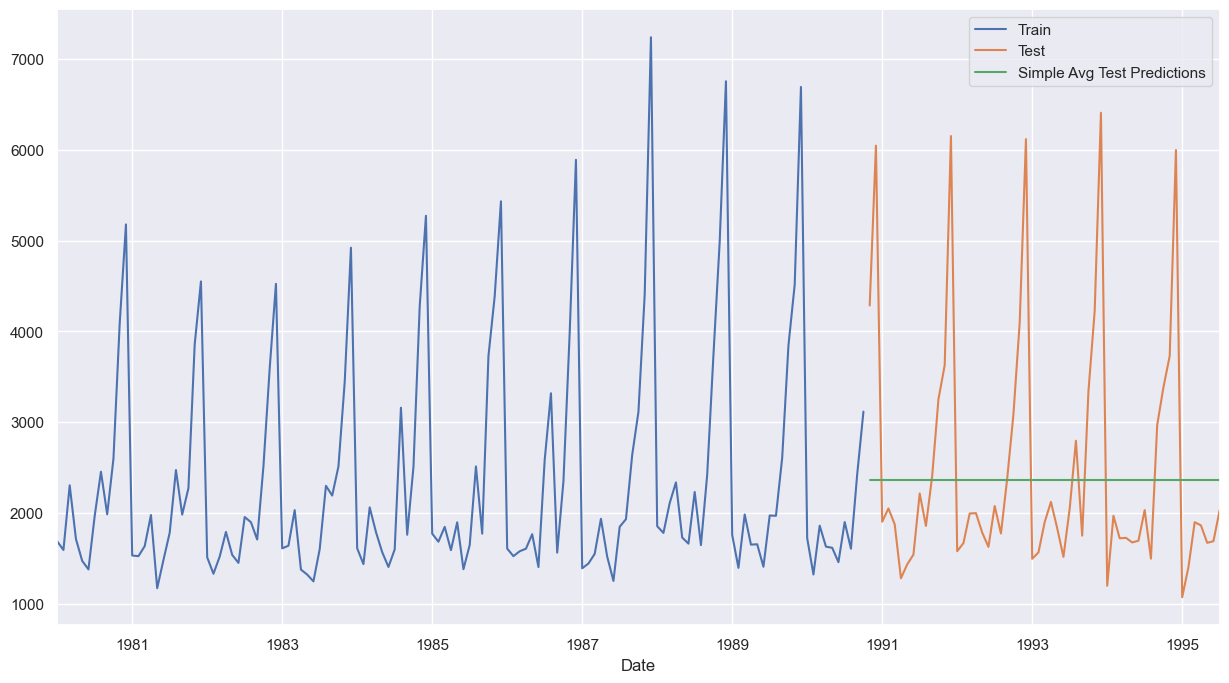

In [257]:
train["Sparkling"].plot(legend = True, label = "Train")
test["Sparkling"].plot(legend = True, label = "Test")
SimpleAverage_test["mean_Sparkling"].plot(legend = True, label = "Simple Avg Test Predictions")
plt.show()

Model Evaluation

In [258]:
rmse_model3_test = rmse(test["Sparkling"], SimpleAverage_test["mean_Sparkling"])
print("RMSE for Simple Average Model is", rmse_model3_test)

RMSE for Simple Average Model is 1368.7467168662013


In [259]:
reultsDf_3 = pd.DataFrame({"Test RMSE": [rmse_model3_test]}, index = ["SimpleAverageModel"])
resultsDf = pd.concat([resultsDf, reultsDf_3])
resultsDf                     


Test RMSE
RegressionOnTime    1392.438305
NaiveModel          1496.444629
SimpleAverageModel  1368.746717

# Moving average model – RMSE

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [260]:
MovingAverage = spdf.copy()
MovingAverage.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Trailing moving averages

In [261]:
MovingAverage["Trailing_2"] = MovingAverage["Sparkling"].rolling(2).mean()
MovingAverage["Trailing_4"] = MovingAverage["Sparkling"].rolling(4).mean()
MovingAverage["Trailing_6"] = MovingAverage["Sparkling"].rolling(6).mean()
MovingAverage["Trailing_9"] = MovingAverage["Sparkling"].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Date                                                                 
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

Plot the data

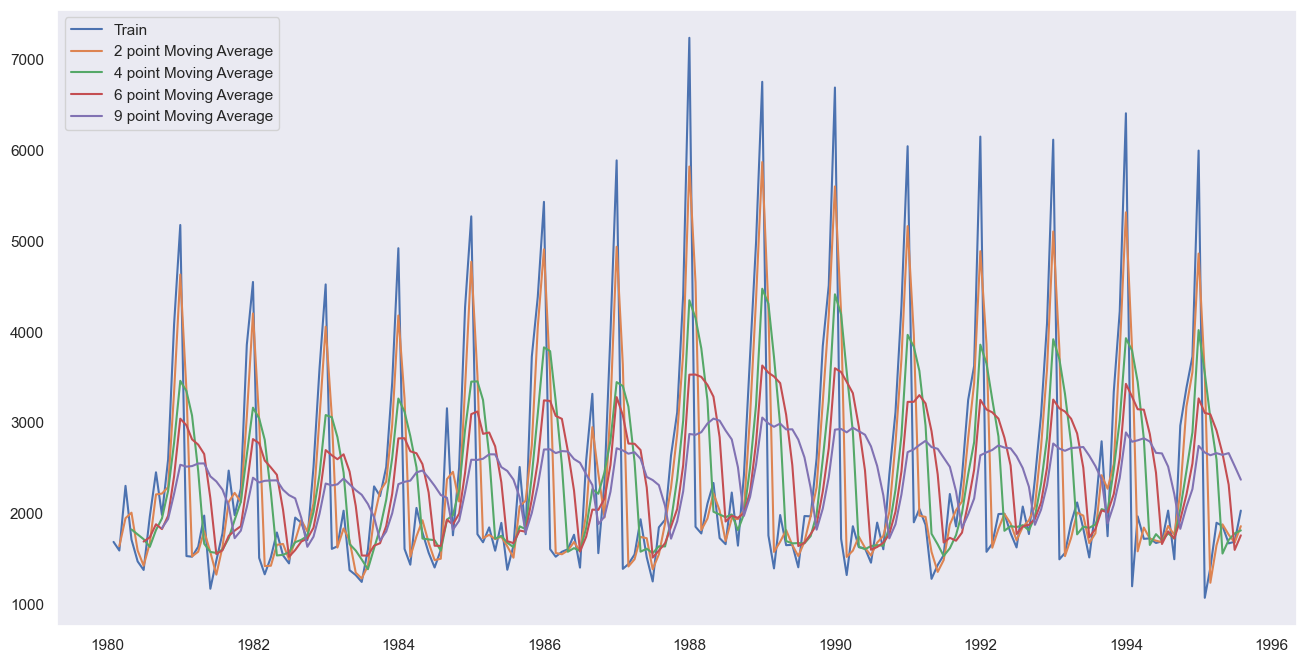

In [262]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage["Sparkling"], label="Train")
plt.plot(MovingAverage["Trailing_2"], label="2 point Moving Average")
plt.plot(MovingAverage["Trailing_4"], label="4 point Moving Average")
plt.plot(MovingAverage["Trailing_6"], label="6 point Moving Average")
plt.plot(MovingAverage["Trailing_9"], label="9 point Moving Average")

plt.legend(loc="best")
plt.grid()
plt.show()

Split the data into train and test and plot

In [263]:
trailing_MovingAverage_train = MovingAverage[0:int(len(MovingAverage)* 0.7)]
trailing_MovingAverage_test = MovingAverage[int(len(MovingAverage)* 0.7):]

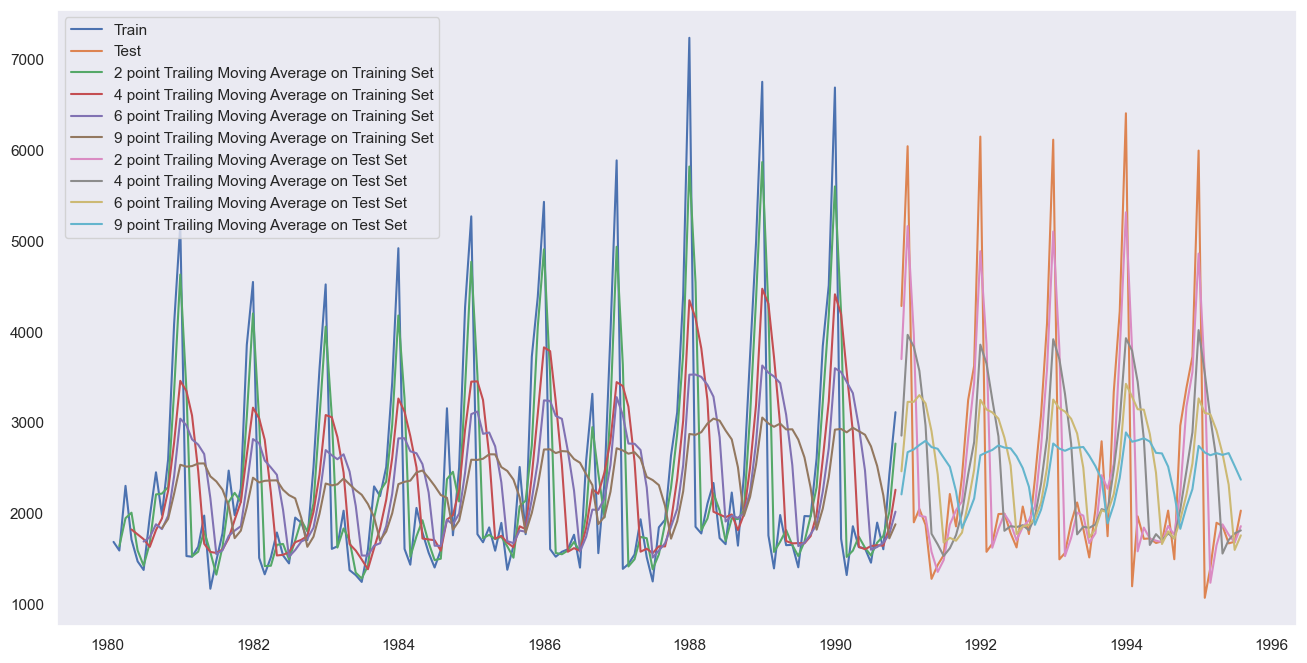

In [264]:
plt.figure(figsize=(16,8))

plt.plot(trailing_MovingAverage_train["Sparkling"], label="Train")
plt.plot(trailing_MovingAverage_test["Sparkling"], label="Test")

plt.plot(trailing_MovingAverage_train["Trailing_2"], label="2 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_4"], label="4 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_6"], label="6 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_9"], label="9 point Trailing Moving Average on Training Set")

plt.plot(trailing_MovingAverage_test["Trailing_2"], label="2 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_4"], label="4 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_6"], label="6 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_9"], label="9 point Trailing Moving Average on Test Set")

plt.legend(loc="best")
plt.grid()
plt.show()

Model Evaluation

In [265]:
rmse_model4_test_2 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_2"])
print("Rmse for trailing_2", rmse_model4_test_2)

rmse_model4_test_4 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_4"])
print("Rmse for trailing_4", rmse_model4_test_4)

rmse_model4_test_6 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_6"])
print("Rmse for trailing_6", rmse_model4_test_6)


rmse_model4_test_9 = rmse(test["Sparkling"], trailing_MovingAverage_test["Trailing_9"])
print("Rmse for trailing_9", rmse_model4_test_9)

resultsDf_4 = pd.DataFrame({"Test RMSE": [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index = ["2_point_trailing_Moving_Average", "4_point_trailing_Moving_Average", "6_point_trailing_Moving_Average", "9_point_trailing_Moving_Average"])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Rmse for trailing_2 811.1789368221167
Rmse for trailing_4 1184.2132946361405
Rmse for trailing_6 1337.2005237587744
Rmse for trailing_9 1422.653280801376


Test RMSE
RegressionOnTime                 1392.438305
NaiveModel                       1496.444629
SimpleAverageModel               1368.746717
2_point_trailing_Moving_Average   811.178937
4_point_trailing_Moving_Average  1184.213295
6_point_trailing_Moving_Average  1337.200524
9_point_trailing_Moving_Average  1422.653281

Plot of all models derived till now

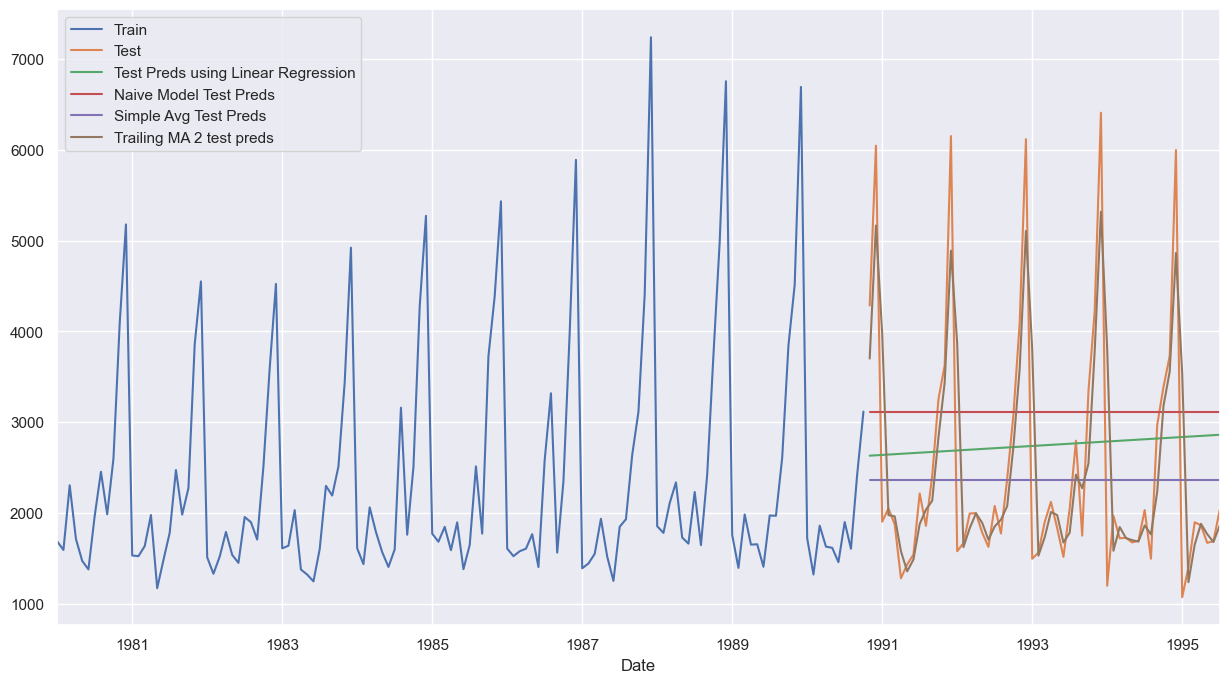

In [266]:
train["Sparkling"].plot(legend=True, label="Train")
test["Sparkling"].plot(legend=True, label="Test")

LinearRegression_test["RegOnTime"].plot(legend=True, label="Test Preds using Linear Regression")

NaiveModel_test["naive"].plot(legend=True, label="Naive Model Test Preds")

SimpleAverage_test["mean_Sparkling"].plot(legend=True, label="Simple Avg Test Preds")

trailing_MovingAverage_test["Trailing_2"].plot(legend=True, label="Trailing MA 2 test preds")

plt.show()

# Simple exponential smoothening – RMSE analysis

In [267]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

'SES Params'

{'smoothing_level': 0.03800422173231477,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2173.2891289089353,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

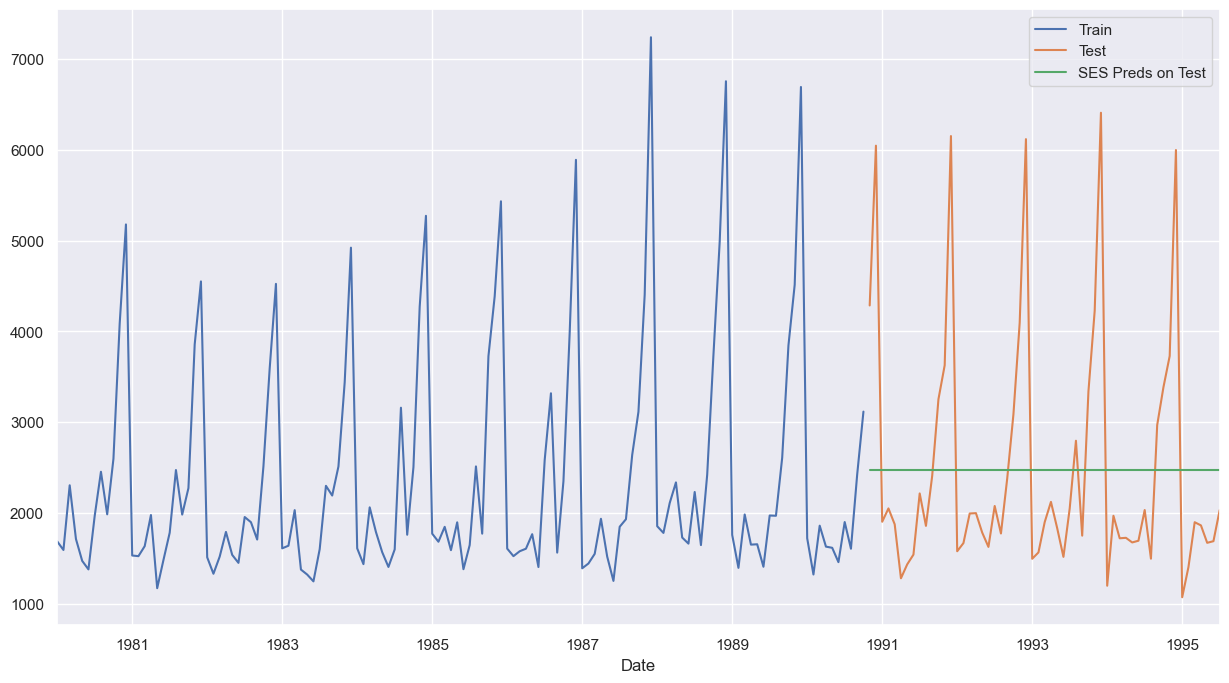

In [268]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train["Sparkling"]);

model_SES_autofit = model_SES.fit()

display("SES Params", model_SES_autofit.params)

SES_test["predict"] = model_SES_autofit.forecast(steps=len(test))

display(SES_test.head().style)

SES_train["Sparkling"].plot(legend=True, label="Train")
SES_test["Sparkling"].plot(legend=True, label="Test")
SES_test["predict"].plot(legend=True, label="SES Preds on Test")
plt.show()


## Model Evaluation

In [269]:
rmse_model5_test_1 = rmse(SES_test["Sparkling"], SES_test["predict"])
display(rmse_model5_test_1)

resultsDf_5 = pd.DataFrame({"Test RMSE": [rmse_model5_test_1]}, index=["Alpha=0.03,SimpleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_5])
display(resultsDf)


1362.3555209102617

Test RMSE
RegressionOnTime                       1392.438305
NaiveModel                             1496.444629
SimpleAverageModel                     1368.746717
2_point_trailing_Moving_Average         811.178937
4_point_trailing_Moving_Average        1184.213295
6_point_trailing_Moving_Average        1337.200524
9_point_trailing_Moving_Average        1422.653281
Alpha=0.03,SimpleExponentialSmoothing  1362.355521

## Set different alpha values

In [270]:
resultsDf_6 = pd.DataFrame({"Alpha Values":[], "Train RMSE": [], "Test RMSE": []})


alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train["predict",i] = model_SES_alpha_i.fittedvalues
    SES_test["predict",i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = rmse(SES_train["Sparkling"],SES_train["predict",i])
        
    rmse_model5_test_i = rmse(SES_test["Sparkling"],SES_test["predict",i])
    
    resultsDf_6 = resultsDf_6.append({"Alpha Values":i,
                                      "Train RMSE": rmse_model5_train_i,"Test RMSE":rmse_model5_test_i}, 
                                     ignore_index=True)
    
display(SES_test.head().style)

display("Model Evaluation", resultsDf_6.sort_values(by=["Test RMSE"],ascending=True))



'Model Evaluation'

Alpha Values   Train RMSE    Test RMSE
1           0.4  1329.787442  1363.037803
2           0.5  1326.393317  1364.863549
0           0.3  1331.009298  1372.323705
3           0.6  1325.584367  1379.988733
4           0.7  1329.256496  1404.659104
5           0.8  1337.879366  1434.578214
6           0.9  1351.645452  1466.179706

## Plot

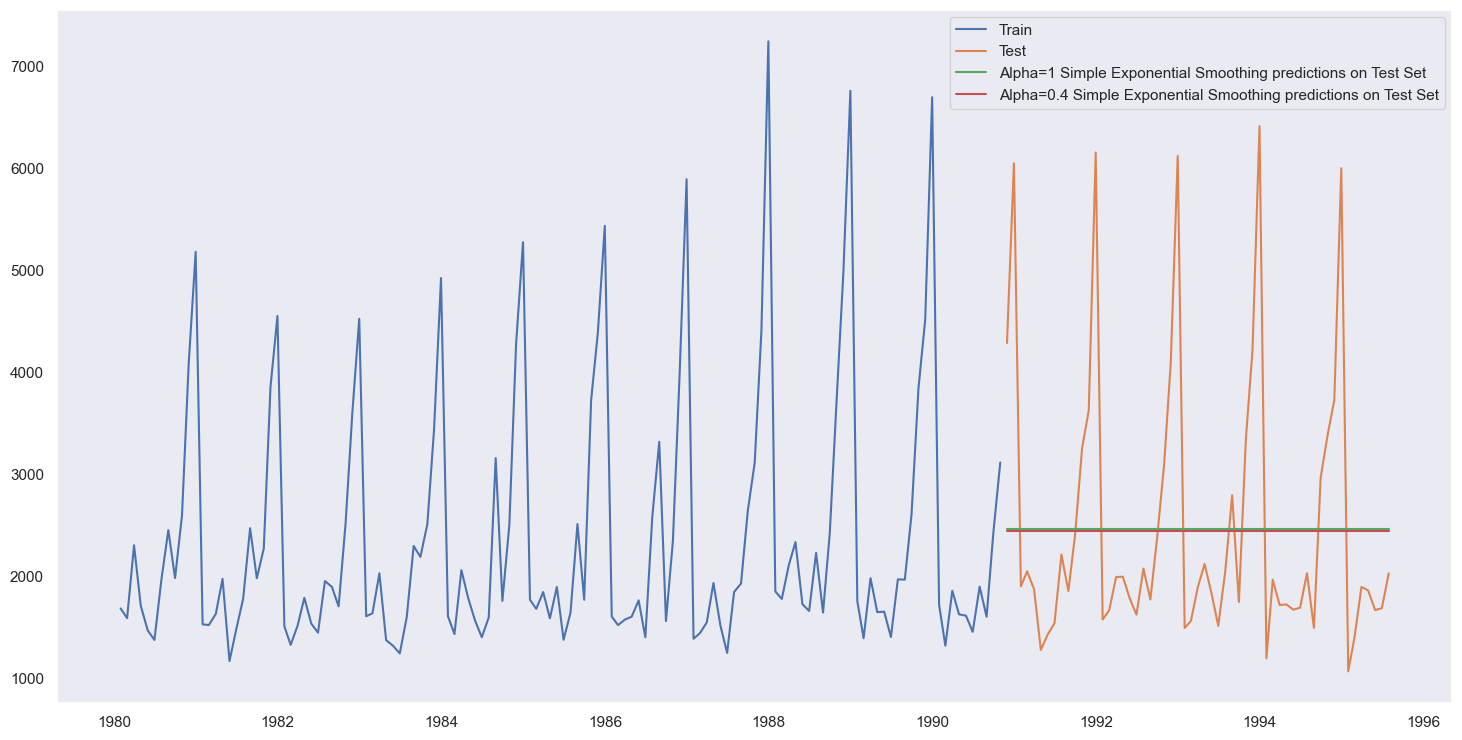

In [271]:
plt.figure(figsize=(18,9))
plt.plot(SES_train["Sparkling"], label="Train")
plt.plot(SES_test["Sparkling"], label="Test")
plt.plot(SES_test["predict"], label="Alpha=1 Simple Exponential Smoothing predictions on Test Set")
plt.plot(SES_test["predict", 0.4], label="Alpha=0.4 Simple Exponential Smoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [272]:
resultsDf_6_1 = pd.DataFrame({"Test RMSE": [resultsDf_6.sort_values(by=["Test RMSE"], ascending=True).values[0][2]]},
                          index = ["Alpha=0.4,SimpleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])

display(resultsDf.style)

# Double exponential smoothening (Holt’s method) – RMSE analysis

In [273]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train["Sparkling"])

resultsDf_7 = pd.DataFrame({"Alpha Values": [], "Beta Values": [], "Train RMSE": [], "Test RMSE": []})

alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train["predict",i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test["predict",i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = rmse(DES_train["Sparkling"],DES_train["predict",i,j])
        
        rmse_model6_test = rmse(DES_test["Sparkling"],DES_test["predict",i,j])
        
        resultsDf_7 = resultsDf_7.append({"Alpha Values":i,
                                          "Beta Values":j,
                                          "Train RMSE": rmse_model6_train,
                                          "Test RMSE": rmse_model6_test}, ignore_index=True)
        
display(resultsDf_7.sort_values(by=["Test RMSE"]).head(10))        


Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1565.315600   1597.853999
1            0.3          0.4  1660.740167   4023.672165
8            0.4          0.3  1555.965701   5049.478887
16           0.5          0.3  1525.257060   7817.569799
2            0.3          0.5  1757.295596   8879.172381
24           0.6          0.3  1505.504513   9371.981434
9            0.4          0.4  1625.507058  10020.909149
32           0.7          0.3  1502.512871  10328.836111
40           0.8          0.3  1513.006949  11035.810416
48           0.9          0.3  1534.359530  11574.981041

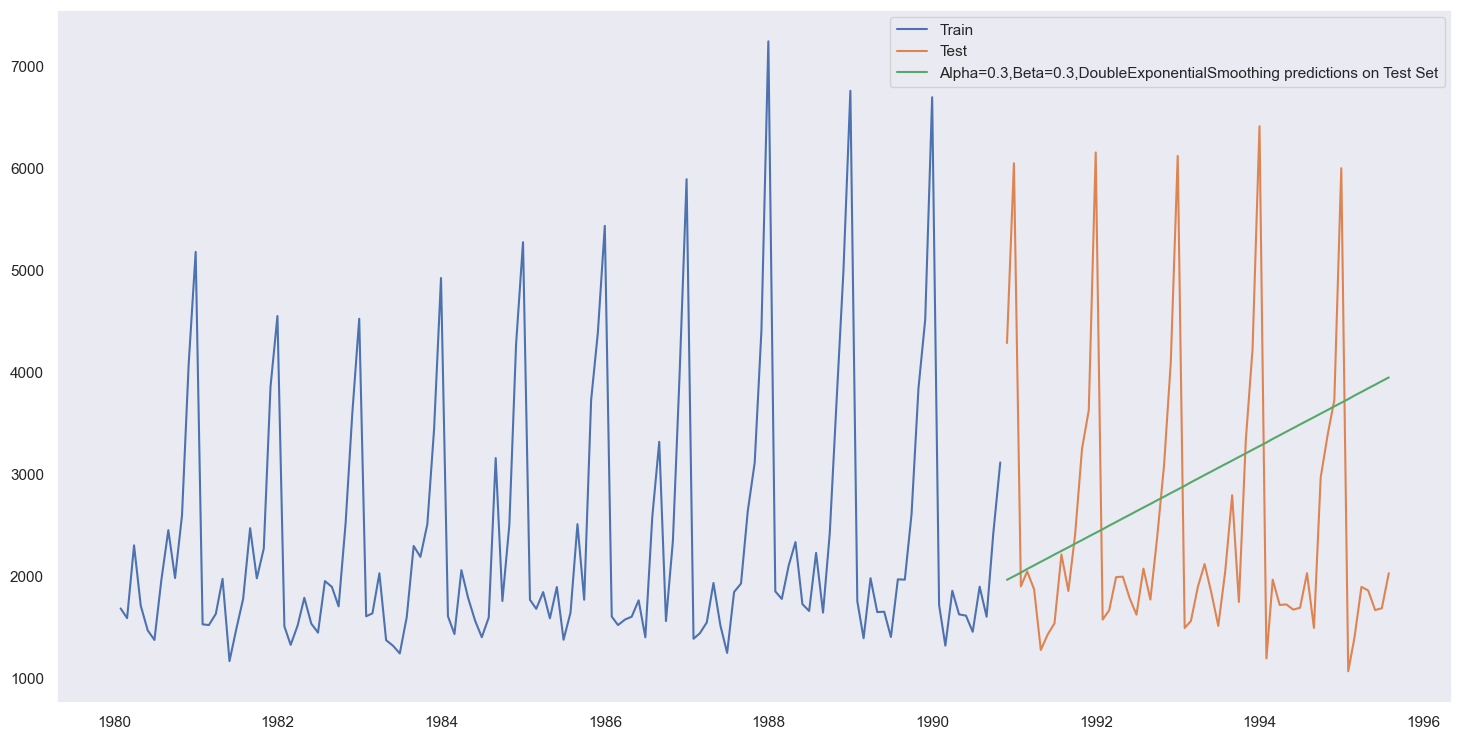

In [274]:
plt.figure(figsize=(18,9))
plt.plot(DES_train["Sparkling"], label="Train")
plt.plot(DES_test["Sparkling"], label="Test")

plt.plot(DES_test["predict", 0.3, 0.3],  label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [275]:
resultsDf_7_1 = pd.DataFrame({"Test RMSE": [resultsDf_7.sort_values(by=["Test RMSE"]).values[0][3]]}, index=["Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
display(resultsDf)

Test RMSE
RegressionOnTime                               1392.438305
NaiveModel                                     1496.444629
SimpleAverageModel                             1368.746717
2_point_trailing_Moving_Average                 811.178937
4_point_trailing_Moving_Average                1184.213295
6_point_trailing_Moving_Average                1337.200524
9_point_trailing_Moving_Average                1422.653281
Alpha=0.03,SimpleExponentialSmoothing          1362.355521
Alpha=0.4,SimpleExponentialSmoothing           1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  1597.853999

# Triple exponential smoothening (Holt’s winter model) – RMSE analysis

{'smoothing_level': 0.14641413473955273,
 'smoothing_trend': 0.05323573958333053,
 'smoothing_seasonal': 0.3939191949293409,
 'damping_trend': nan,
 'initial_level': 1639.9128717398999,
 'initial_trend': -12.97964653071272,
 'initial_seasons': array([1.06462785, 1.03764402, 1.40675758, 1.22452635, 0.98308468,
        0.98085203, 1.33851246, 1.72546812, 1.40223263, 1.83639979,
        2.90142157, 3.69147204]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Sparkling  auto_predict
Date                               
1990-11-30       4286        4166.0
1990-12-31       6047        5979.0
1991-01-31       1902        1548.0
1991-02-28       2049        1309.0
1991-03-31       1874        1720.0

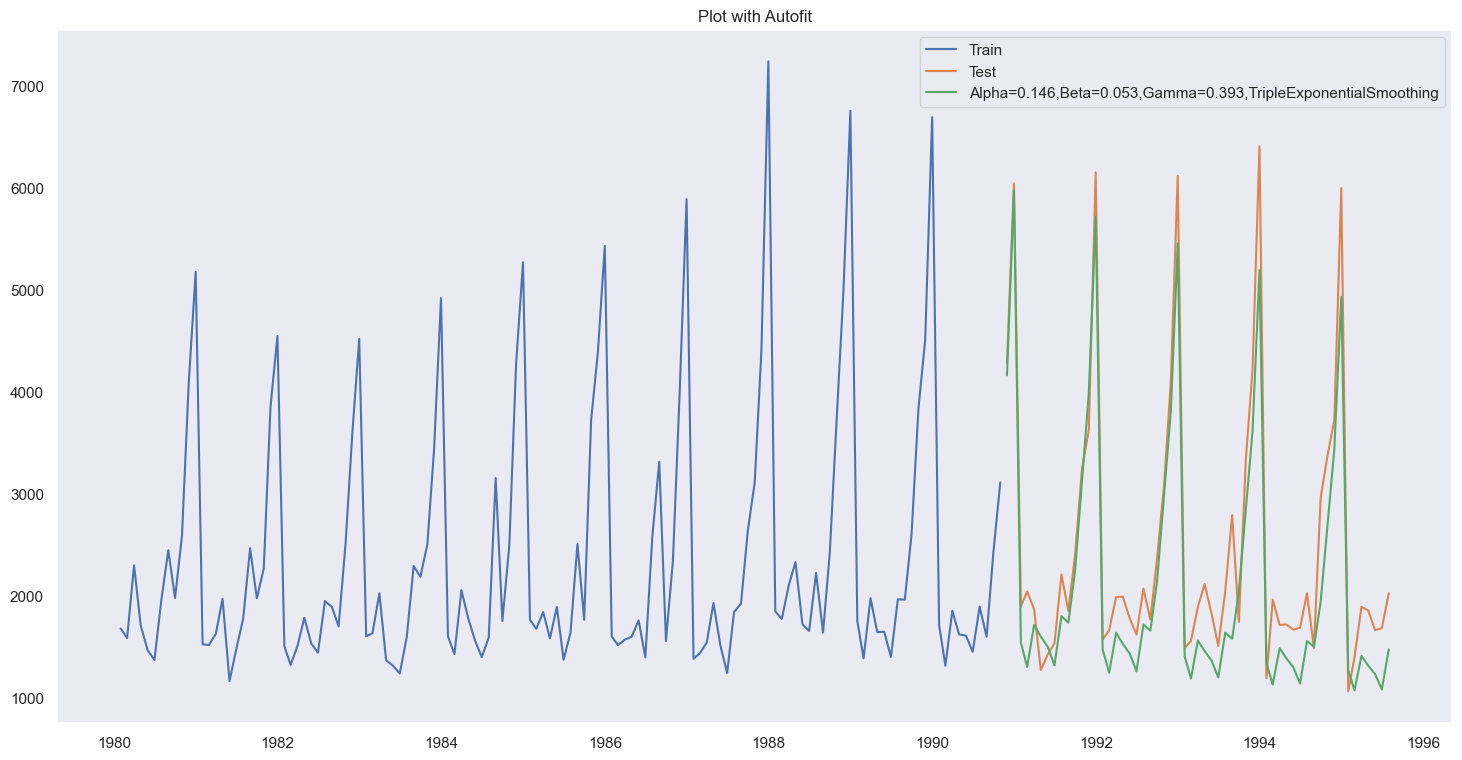

In [276]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train["Sparkling"], trend="additive", seasonal="multiplicative", freq="M")

model_TES_autofit = model_TES.fit()

display(model_TES_autofit.params)


TES_test["auto_predict"] = model_TES_autofit.forecast(steps=len(test)).round(0)
display(TES_test.head())

plt.figure(figsize=(18,9))
plt.plot(TES_train["Sparkling"], label="Train")
plt.plot(TES_test["Sparkling"], label="Test")
plt.plot(TES_test["auto_predict"], label="Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExponentialSmoothing")
plt.legend(loc="best")
plt.title("Plot with Autofit")
plt.grid()

plt.show()



## RMSE

In [277]:
rmse_model6_test_1 = rmse(TES_test["Sparkling"], TES_test["auto_predict"])
display(rmse_model6_test_1)

resultsDf_8_1 = pd.DataFrame({"Test RMSE": [rmse_model6_test_1]}, index=["Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
display(resultsDf)

485.5222364683858

Test RMSE
RegressionOnTime                                    1392.438305
NaiveModel                                          1496.444629
SimpleAverageModel                                  1368.746717
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
9_point_trailing_Moving_Average                     1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236

## Identify best alpha, beta and gamma

In [278]:
resultsDf_8_2 = pd.DataFrame({"Alpha Values":[],"Beta Values":[],"Gamma Values":[],"Train RMSE":[],"Test RMSE": []})


gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train["predict",i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test["predict",i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = rmse(TES_train["Sparkling"],
                                     TES_train["predict",i,j,k])
            
            rmse_model8_test = rmse(TES_test["Sparkling"],
                                    TES_test["predict",i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({"Alpha Values":i,
                                                  "Beta Values":j,
                                                  "Gamma Values":k,
                                                  "Train RMSE":rmse_model8_train,
                                                  "Test RMSE":rmse_model8_test},ignore_index=True)
            
display(TES_test.head().style)
display(resultsDf_8_2.sort_values(by=["Test RMSE"]).head())


resultsDf_8_3 = pd.DataFrame({"Test RMSE": [resultsDf_8_2.sort_values(by=["Test RMSE"]).values[0][4]]}
                           ,index=["Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
display(resultsDf.sort_values(by=["Test RMSE"]))



Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
256           0.7          0.3           0.3  479.249902  410.692577
144           0.5          0.5           0.3  470.607632  412.083175
200           0.6          0.4           0.3  477.649478  454.165218
136           0.5          0.4           0.3  444.862385  576.260714
161           0.5          0.7           0.4  577.137167  632.363548

Test RMSE
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
SimpleAverageModel                                  1368.746717
RegressionOnTime                                    1392.438305
9_point_trailing_Moving_Average                     1422.653281
NaiveModel                                          1496.444629
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

## Plot SES, DES and TES

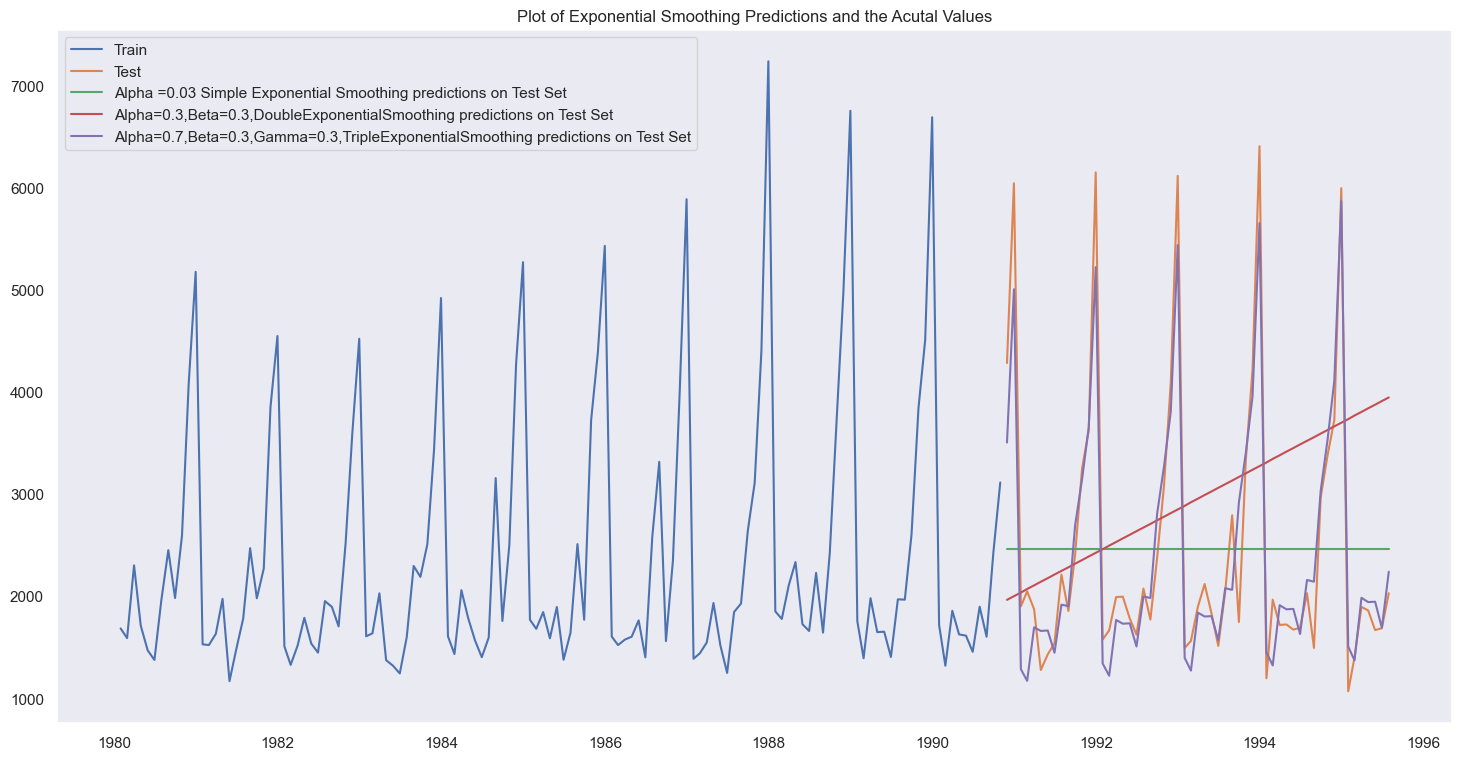

In [279]:
plt.figure(figsize=(18,9))
plt.plot(train["Sparkling"], label="Train")
plt.plot(test["Sparkling"], label="Test")

plt.plot(SES_test["predict"], label="Alpha =0.03 Simple Exponential Smoothing predictions on Test Set")

plt.plot(DES_test["predict", 0.3, 0.3], label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")

plt.plot(TES_test["predict", 0.7, 0.3, 0.3], label="Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set")

plt.legend(loc="best")
plt.grid();
plt.title("Plot of Exponential Smoothing Predictions and the Acutal Values");
plt.show()

## Training TES model with full data

'RMSE'

507.2986253194253

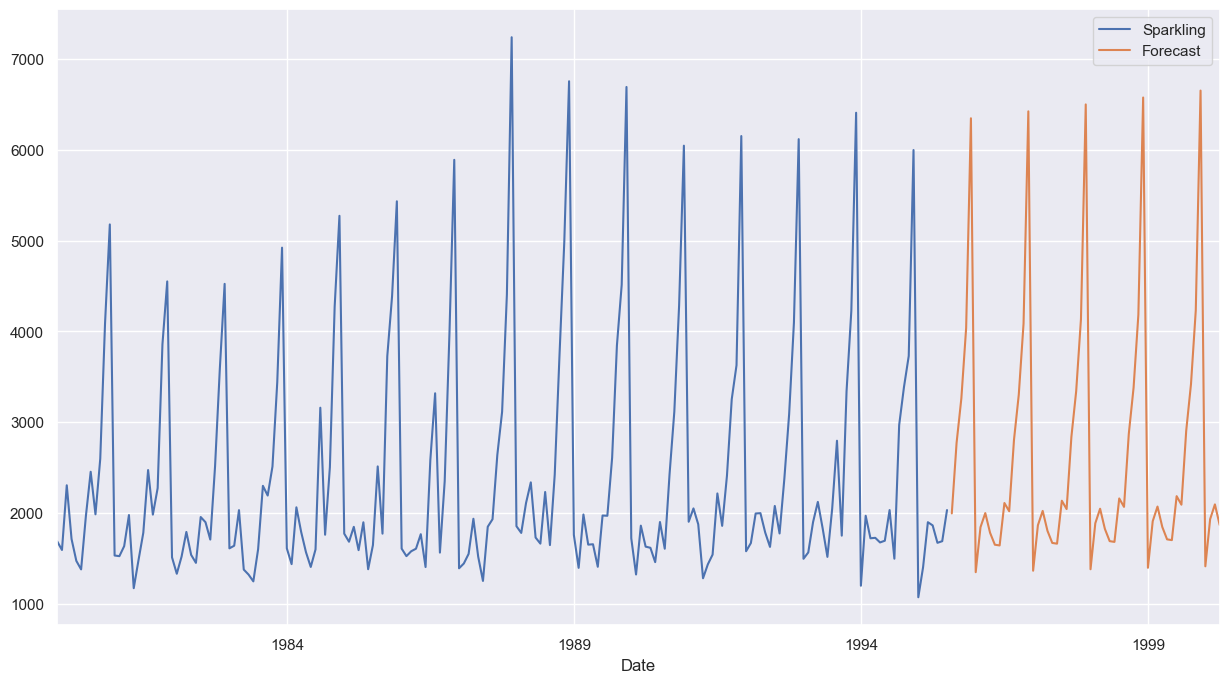

In [280]:
fullmodel1 = ExponentialSmoothing(spdf,trend="additive",seasonal="multiplicative")
fullmodel1= fullmodel1.fit(smoothing_level=0.7, smoothing_trend=0.3, smoothing_seasonal=0.3)

RMSE_fullmodel1 = rmse(spdf["Sparkling"], fullmodel1.fittedvalues)
display("RMSE", RMSE_fullmodel1)

prediction_1 = fullmodel1.forecast(steps=len(test))

spdf.plot(legend=True, label="Actual")
prediction_1.plot(legend=True, label="Forecast")

plt.show()


## Margin of Error

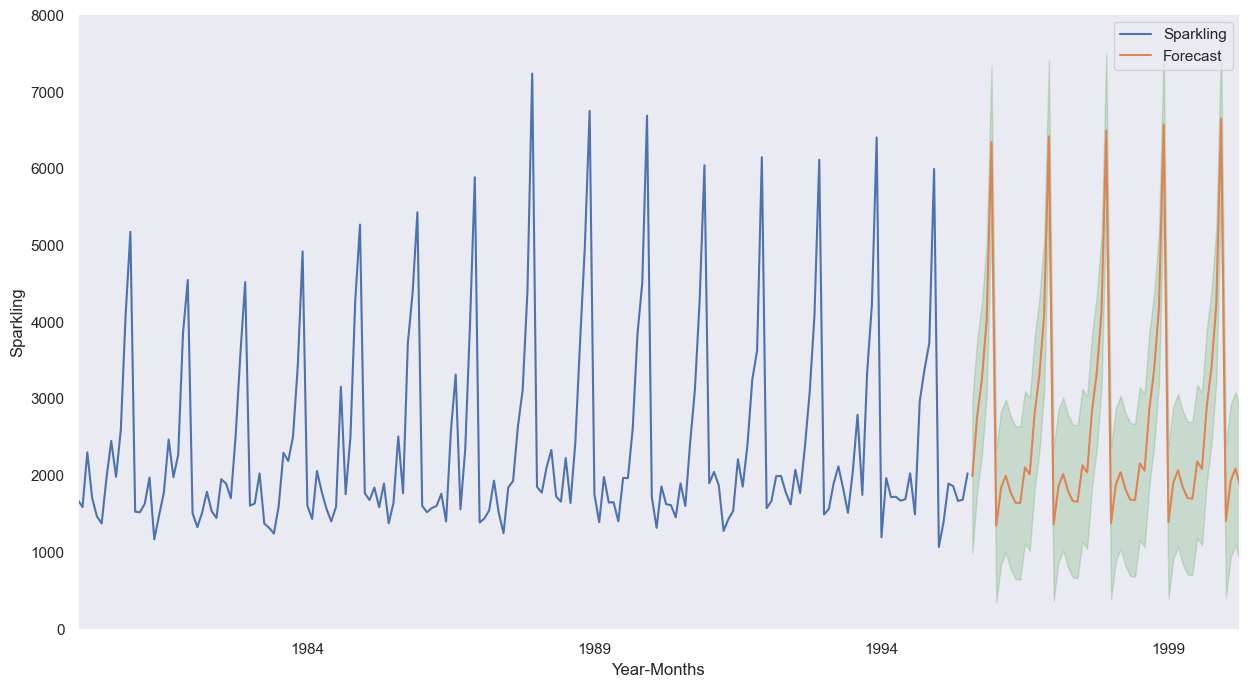

In [281]:
pred_1_df = pd.DataFrame({"lower_CI":prediction_1 - 1.96*fullmodel1.resid.std(),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*fullmodel1.resid.std()})
display(pred_1_df.head().style)


axis = spdf.plot(label="Actual", figsize=(15,8))
pred_1_df["prediction"].plot(ax=axis, label="Forecast", alpha=1) # alpha here is for transparency of the prediction line

axis.fill_between(pred_1_df.index, pred_1_df["lower_CI"], pred_1_df["upper_ci"], color="green", alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling")
plt.legend(loc="best")
plt.grid()
plt.show();

# Stationarity check with AdFuller

In [282]:
from statsmodels.tsa.stattools import adfuller

display("Results of Dickey-Fuller Test:")
dftest = adfuller(spdf["Sparkling"])

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])

for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value

display(dfoutput)
display("P Value: ", dftest[1], "H0 rejected and the time series is stationary")

'Results of Dickey-Fuller Test:'

Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64

'P Value: '

0.6010608871634866

'H0 rejected and the time series is stationary'

# Build ARIMA model with lowest AIC score – test this model on test data using RMSE

In [283]:
import itertools # library for generating all possible combinations of given number sets
from statsmodels.tsa.arima_model import ARIMA

p = q = range(0, 4)
d= range(1,2) # required as itertools product function expects the parameters as range objects, even if it is only value

pdq = list(itertools.product(p, d, q))
 
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=["Param", "AIC"])
ARIMA_AIC

for param in pdq:
    ARIMA_model = ARIMA(train["Sparkling"], order=param).fit()
    
    display(f"ARIMA{param} - AIC:{ARIMA_model.aic}")
    
    ARIMA_AIC=ARIMA_AIC.append({"Param":param, "AIC": ARIMA_model.aic}, ignore_index=True)
    
display(ARIMA_AIC.sort_values(by=["AIC"],ascending=True))    

'ARIMA(0, 1, 0) - AIC:2234.707214654729'

'ARIMA(0, 1, 1) - AIC:2228.1503745656123'

'ARIMA(0, 1, 2) - AIC:2193.88235127859'

'ARIMA(0, 1, 3) - AIC:2194.676687297557'

'ARIMA(1, 1, 0) - AIC:2233.1420914111595'

'ARIMA(1, 1, 1) - AIC:2196.4628372737047'

'ARIMA(1, 1, 2) - AIC:2195.095365936407'

'ARIMA(1, 1, 3) - AIC:2196.1558073216856'

'ARIMA(2, 1, 0) - AIC:2225.6606144202888'

'ARIMA(2, 1, 1) - AIC:2193.8686025920533'

'ARIMA(2, 1, 2) - AIC:2175.563811481747'

'ARIMA(2, 1, 3) - AIC:2189.5117376317016'

'ARIMA(3, 1, 0) - AIC:2222.3256525238526'

'ARIMA(3, 1, 1) - AIC:2195.5247663282657'

'ARIMA(3, 1, 2) - AIC:2190.8524080869843'

'ARIMA(3, 1, 3) - AIC:2187.5633051996338'

Param          AIC
10  (2, 1, 2)  2175.563811
15  (3, 1, 3)  2187.563305
11  (2, 1, 3)  2189.511738
14  (3, 1, 2)  2190.852408
9   (2, 1, 1)  2193.868603
2   (0, 1, 2)  2193.882351
3   (0, 1, 3)  2194.676687
6   (1, 1, 2)  2195.095366
13  (3, 1, 1)  2195.524766
7   (1, 1, 3)  2196.155807
5   (1, 1, 1)  2196.462837
12  (3, 1, 0)  2222.325653
8   (2, 1, 0)  2225.660614
1   (0, 1, 1)  2228.150375
4   (1, 1, 0)  2233.142091
0   (0, 1, 0)  2234.707215

In [284]:
auto_ARIMA = ARIMA(train["Sparkling"], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

display(results_auto_ARIMA.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Sparkling   No. Observations:                  129
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1081.782
Method:                       css-mle   S.D. of innovations           1007.047
Date:                Fri, 13 Aug 2021   AIC                           2175.564
Time:                        03:55:55   BIC                           2192.723
Sample:                    02-29-1980   HQIC                          2182.536
                         - 10-31-1990                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.3762      0.599      8.977      0.000       4.202       6.550
ar.L1.D.Sparkling     1.2595      0.075     16.844      0.000       1.113       1.406
ar.L2.D.Sparkling    -0.5364      0.074     -7.209      0.000      -0.682      -0.391
ma.L1.D.Sparkling    -1.9980      0.046    -43.448      0.000      -2.088      -1.908
ma.L2.D.Sparkling     0.9980      0.046     21.687      0.000       0.908       1.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1741           -0.6970j            1.3654           -0.0853
AR.2            1.1741           +0.6970j            1.3654            0.0853
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2            1.0019           +0.0000j            1.0019            0.0000
-----------------------------------------------------------------------------
"""

## Prediction

In [285]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

RMSE_autoarima = rmse(test["Sparkling"],predicted_auto_ARIMA[0])
display(RMSE_autoarima)

resultsDf_arima = pd.DataFrame({'Test RMSE': [RMSE_autoarima]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_arima])

display(resultsDf)

1364.2010249974928

Test RMSE
RegressionOnTime                                    1392.438305
NaiveModel                                          1496.444629
SimpleAverageModel                                  1368.746717
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
9_point_trailing_Moving_Average                     1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
ARIMA(2,1,2)                                        1364.201025

## Manual Arima using ACF and PACF plots

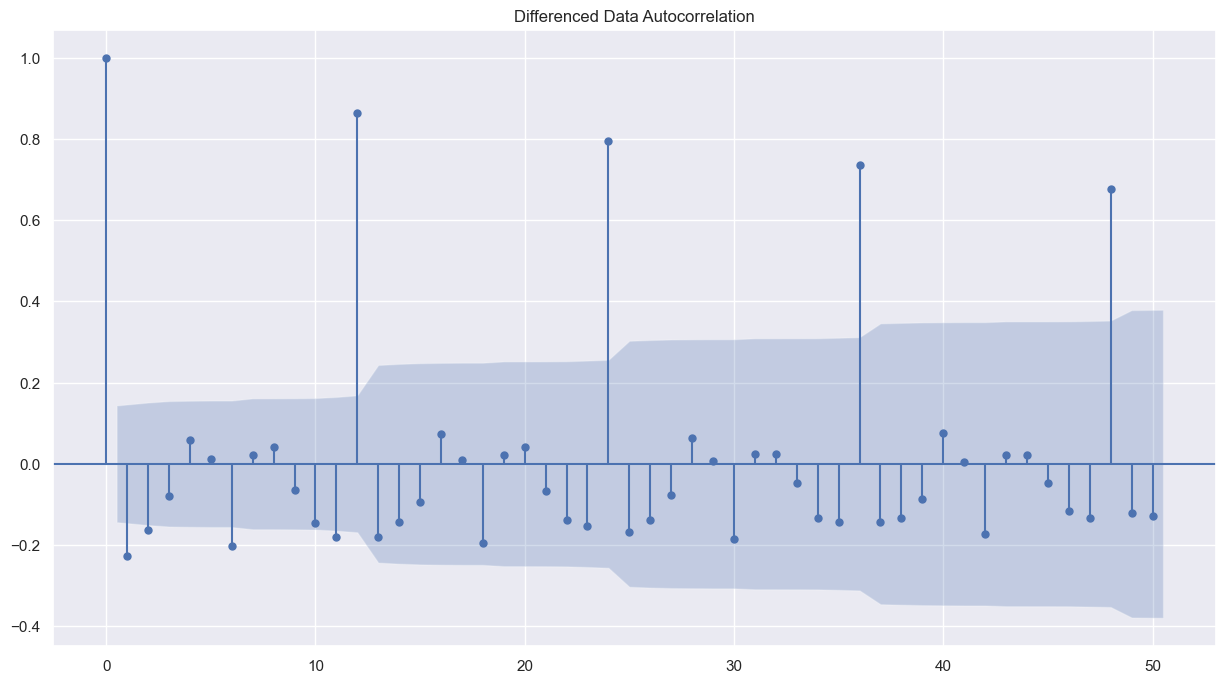

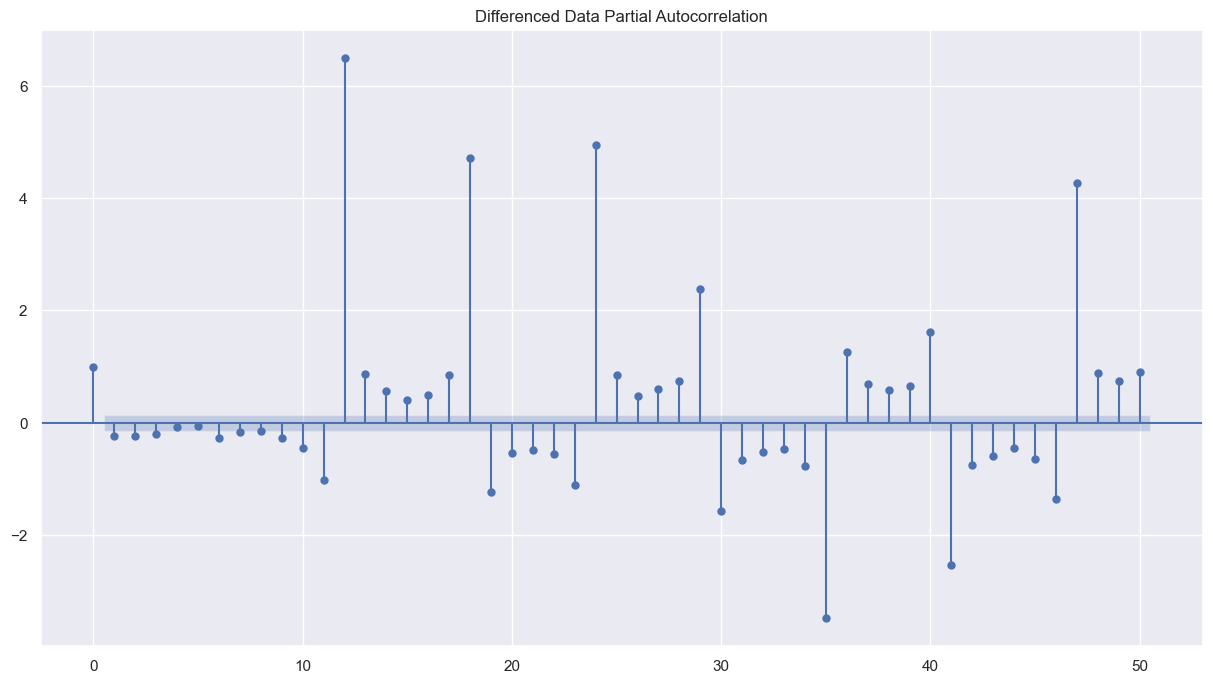

'p value from PACF: 3 & q value from ACF: 2'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Sparkling   No. Observations:                  129
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1088.426
Method:                       css-mle   S.D. of innovations           1087.802
Date:                Fri, 13 Aug 2021   AIC                           2190.852
Time:                        03:55:57   BIC                           2210.871
Sample:                    02-29-1980   HQIC                          2198.986
                         - 10-31-1990                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.0526      3.568      1.136      0.256      -2.940      11.045
ar.L1.D.Sparkling    -0.4681   9.17e-06  -5.11e+04      0.000      -0.468      -0.468
ar.L2.D.Sparkling     0.2886   5.21e-05   5539.444      0.000       0.289       0.289
ar.L3.D.Sparkling    -0.2433   4.65e-05  -5228.260      0.000      -0.243      -0.243
ma.L1.D.Sparkling    -0.0008      0.020     -0.039      0.969      -0.040       0.039
ma.L2.D.Sparkling    -0.9992      0.020    -49.788      0.000      -1.039      -0.960
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           -0.0000j            1.0000           -0.5000
AR.2            1.0932           -1.7074j            2.0274           -0.1594
AR.3            1.0932           +1.7074j            2.0274            0.1594
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0008           +0.0000j            1.0008            0.5000
-----------------------------------------------------------------------------
"""

Test RMSE
RegressionOnTime                                    1392.438305
NaiveModel                                          1496.444629
SimpleAverageModel                                  1368.746717
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
9_point_trailing_Moving_Average                     1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
ARIMA(2,1,2)                                        1364.201025
Manual ARIMA(3,1,2)                                 1363.340999

In [286]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(spdf["Sparkling"].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');
plot_pacf(spdf["Sparkling"].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation');
plt.show()

display("p value from PACF: 3 & q value from ACF: 2")

manual_ARIMA = ARIMA(train["Sparkling"].astype("float64"), order=(3,1,2),freq="M")
results_manual_ARIMA = manual_ARIMA.fit()
display(results_manual_ARIMA.summary())

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

RMSE_manualarima = rmse(test["Sparkling"],
                        predicted_manual_ARIMA[0])

resultsDf_manual_arima = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['Manual ARIMA(3,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_arima])

display(resultsDf)

# Build SARIMA model with lowest AIC score – test this model on test data using RMSE

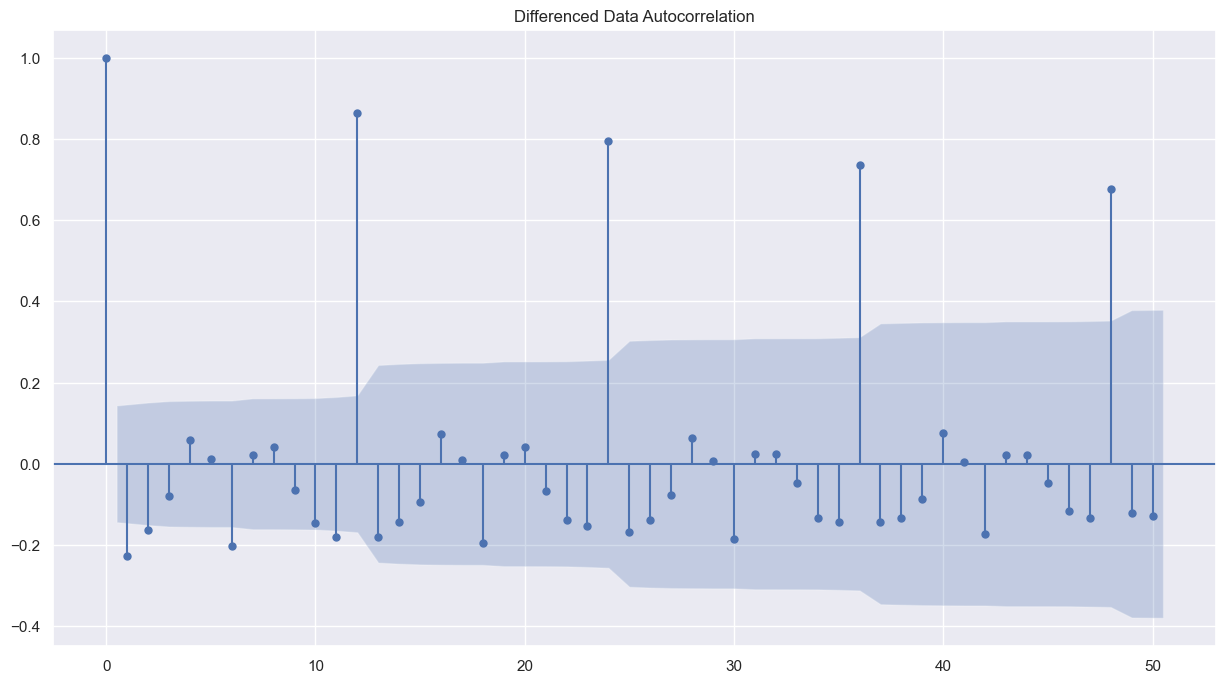

'Seasonality is observed for 6 and 12'

In [287]:
plot_acf(spdf["Sparkling"].diff().dropna(),lags=50,title="Differenced Data Autocorrelation");
plt.show()

display("Seasonality is observed for 6 and 12")

In [288]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] # seasonal PDQ


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])




In [289]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(train["Sparkling"],order=param, 
                               seasonal_order = param_seasonal,enforce_stationarity=False,
                               enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)


In [290]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1694.342841
26  (0, 1, 2)  (2, 0, 2, 6)  1694.839211
80  (2, 1, 2)  (2, 0, 2, 6)  1695.573438
17  (0, 1, 1)  (2, 0, 2, 6)  1708.125765
44  (1, 1, 1)  (2, 0, 2, 6)  1710.045543

In [291]:
auto_SARIMA_6 = SARIMAX(train["Sparkling"].values,
                       order=(1,1,2),
                       seasonal_order=(2,0,2,6),
                       enforce_stationarity=False,
                       enforce_ivertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
display(results_auto_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -847.407
Date:                           Fri, 13 Aug 2021   AIC                           1710.815
Time:                                   03:56:51   BIC                           1732.704
Sample:                                        0   HQIC                          1719.698
                                           - 130                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9307      0.039     23.624      0.000       0.853       1.008
ma.L1         -1.9976      0.768     -2.602      0.009      -3.502      -0.493
ma.L2          0.9980      0.766      1.303      0.193      -0.504       2.499
ar.S.L6       -0.0033      0.024     -0.141      0.888      -0.050       0.043
ar.S.L12       1.0551      0.019     56.697      0.000       1.019       1.092
ma.S.L6        0.1996      0.812      0.246      0.806      -1.391       1.790
ma.S.L12      -0.7992      0.645     -1.239      0.215      -2.063       0.465
sigma2      1.283e+05   1.17e-05    1.1e+10      0.000    1.28e+05    1.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                11.61
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               3.54   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.96e+26. Standard errors may be unstable.
"""

## Prediction on the Test Set and Evaluation

In [292]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head())

rmse_autosarima6 = rmse(test["Sparkling"], predicted_auto_SARIMA_6.predicted_mean)
display(rmse_autosarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE" : [rmse_autosarima6]}, index = ["SARIMA(1,1,2)(2,0,2,6)"])
resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  5234.292058  372.807697    4503.602398    5964.981718
1  7297.200970  372.923097    6566.285131    8028.116809
2  1915.135491  372.906648    1184.251890    2646.019091
3  1337.446755  372.140917     608.063960    2066.829549
4  2196.219016  372.271032    1466.581201    2925.856832

871.032023963726

Test RMSE
RegressionOnTime                                    1392.438305
NaiveModel                                          1496.444629
SimpleAverageModel                                  1368.746717
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
9_point_trailing_Moving_Average                     1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
ARIMA(2,1,2)                                        1364.201025
Manual ARIMA(3,1,2)                                 1363.340999
SARIMA(1,1,2)(2,0,2,6)                               871.032024

## SARIMA for 12 Seasonality

In [293]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [294]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train["Sparkling"],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)

In [295]:
SARIMA_AIC.sort_values(by=["AIC"]).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.737955
50  (1, 1, 2)  (1, 0, 2, 12)  1521.949494
80  (2, 1, 2)  (2, 0, 2, 12)  1523.223053
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524946
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707297

In [296]:
auto_SARIMA_12 =SARIMAX(train["Sparkling"],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

display(results_auto_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -752.869
Date:                            Fri, 13 Aug 2021   AIC                           1521.738
Time:                                    03:59:19   BIC                           1542.738
Sample:                                01-31-1980   HQIC                          1530.241
                                     - 10-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6466      0.268     -2.415      0.016      -1.171      -0.122
ma.L1          0.2835      0.300      0.944      0.345      -0.305       0.872
ma.L2         -1.1683      0.331     -3.529      0.000      -1.817      -0.519
ar.S.L12       0.7532      0.508      1.482      0.138      -0.243       1.749
ar.S.L24       0.3250      0.541      0.601      0.548      -0.735       1.385
ma.S.L12      -0.9794      0.491     -1.997      0.046      -1.941      -0.018
ma.S.L24      -0.5626      0.670     -0.840      0.401      -1.875       0.750
sigma2      4.952e+04   2.51e+04      1.975      0.048     382.828    9.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 8.05
Prob(Q):                              0.69   Prob(JB):                         0.02
Heteroskedasticity (H):               1.46   Skew:                             0.21
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set and Evaluation

In [297]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head())

rmse_autosarima12 = rmse(test["Sparkling"], predicted_auto_SARIMA_12.predicted_mean)

display("RMSE", rmse_autosarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_autosarima12]}, index=['SARIMA(1,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-11-30  4695.891736  380.030457    3951.045727    5440.737746
1990-12-31  7226.446359  388.883360    6464.248979    7988.643738
1991-01-31  1584.495202  389.273717     821.532736    2347.457668
1991-02-28  1417.430509  392.114399     648.900408    2185.960609
1991-03-31  1828.791153  392.150554    1060.190191    2597.392114

'RMSE'

712.7484012954795

Test RMSE
RegressionOnTime                                    1392.438305
NaiveModel                                          1496.444629
SimpleAverageModel                                  1368.746717
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
9_point_trailing_Moving_Average                     1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
ARIMA(2,1,2)                                        1364.201025
Manual ARIMA(3,1,2)                                 1363.340999
SARIMA(1,1,2)(2,0,2,6)                               871.032024
SARIMA(1,1,2)(2,0,2,12)                              712.748401

## Manual SARIMA model - Best Params seleced from ACF and PACF plots - Seasonality 6

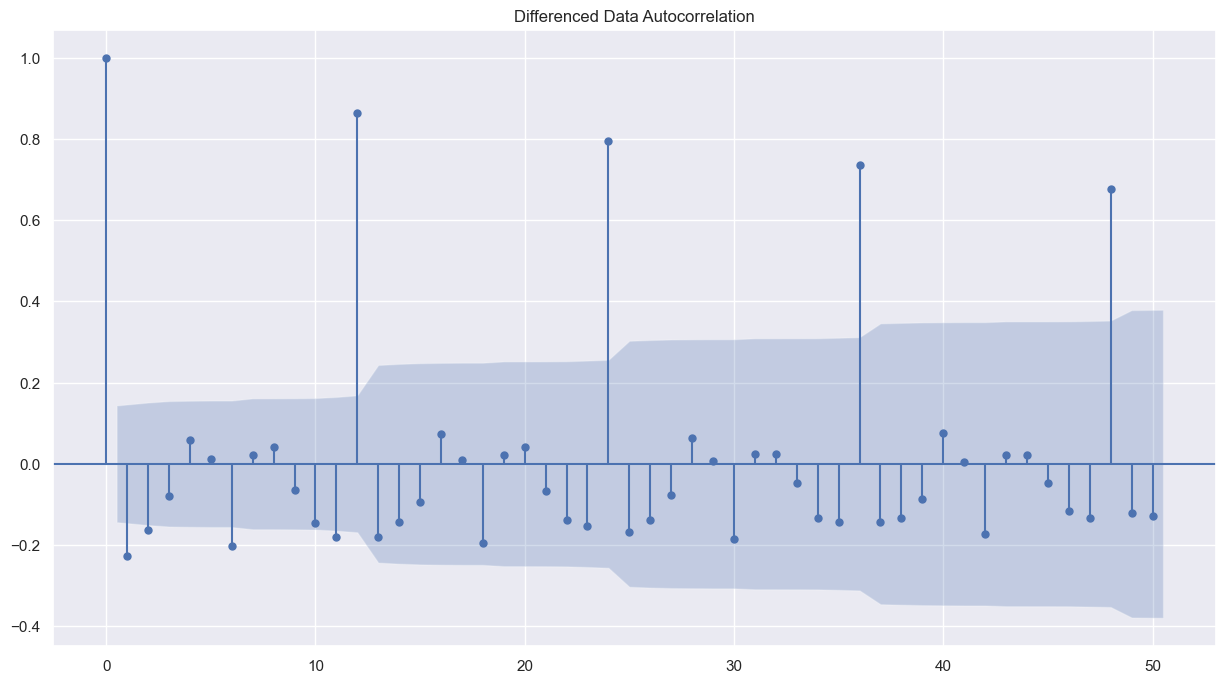

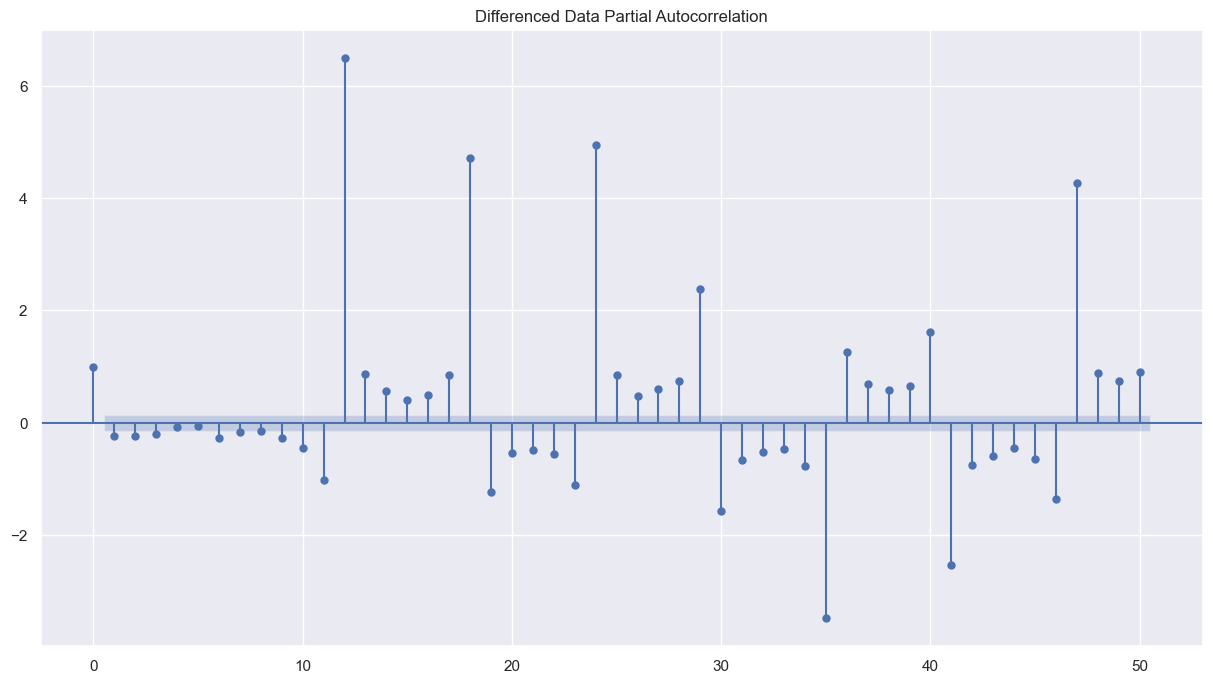

In [298]:
plot_acf(spdf["Sparkling"].diff().dropna(), lags=50, title="Differenced Data Autocorrelation")
plot_pacf(spdf["Sparkling"].diff().dropna(), lags=50, title="Differenced Data Partial Autocorrelation")

plt.show()

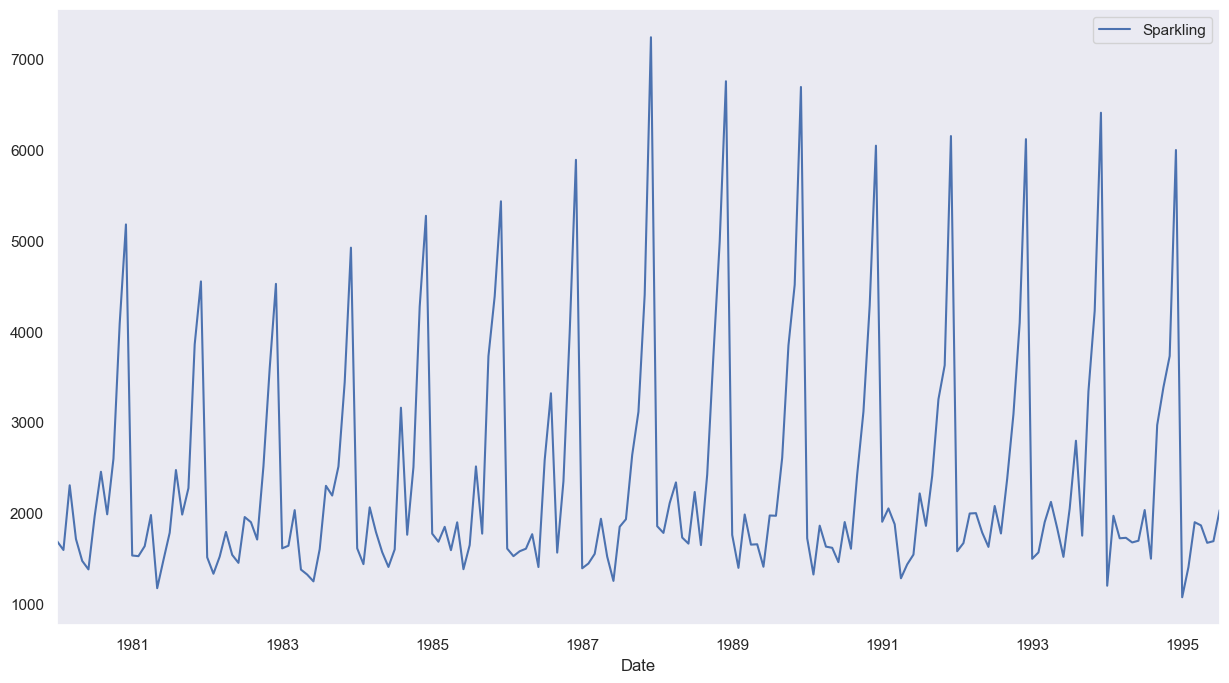

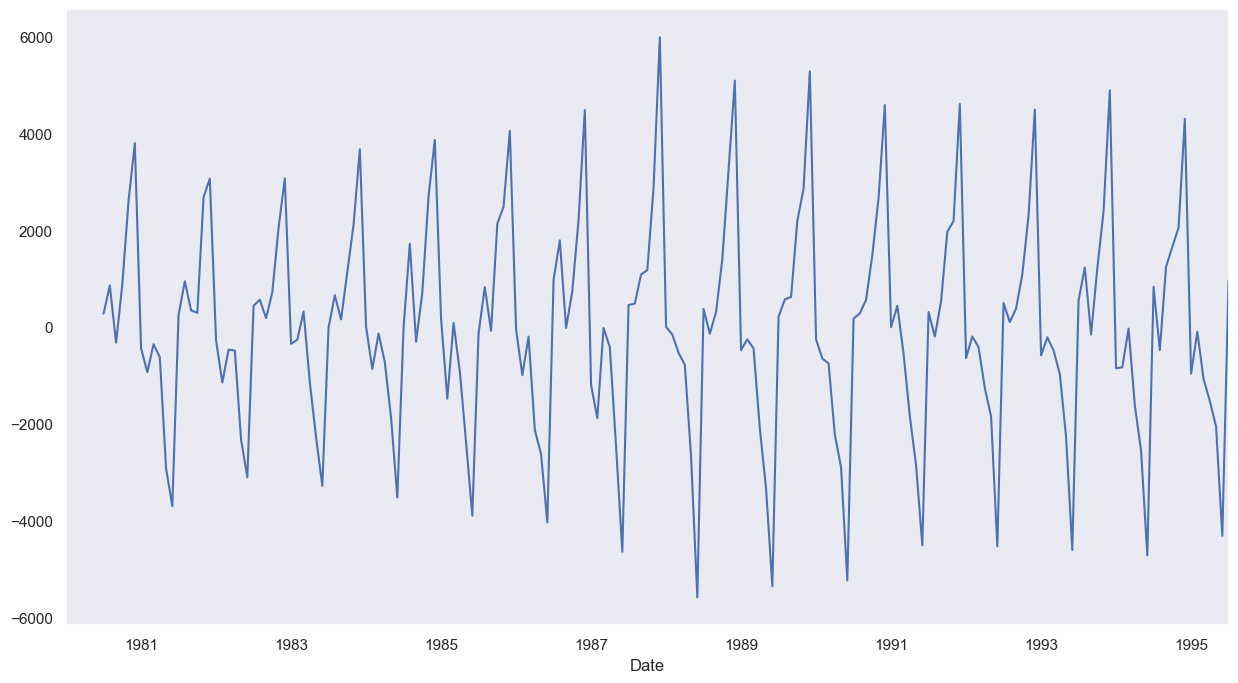

In [299]:
spdf.plot()
plt.grid()
plt.show()

(spdf["Sparkling"].diff(6)).plot()
plt.grid()
plt.show()

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

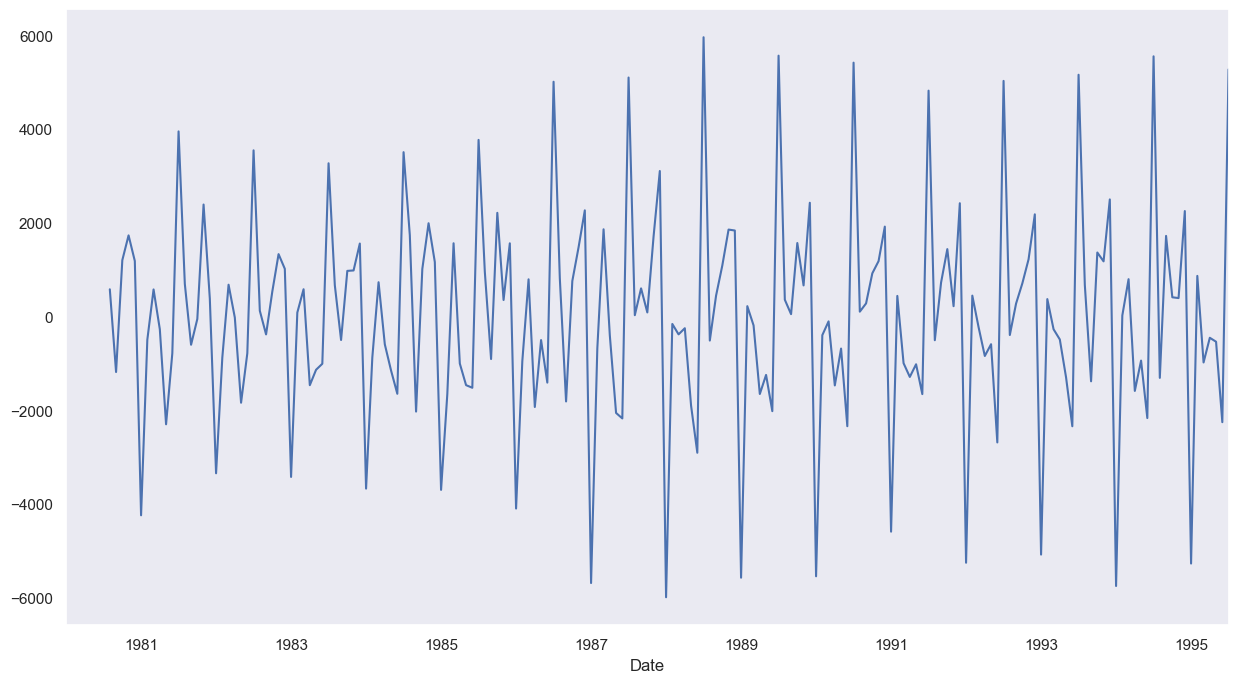

In [300]:
(spdf["Sparkling"].diff(6)).diff().plot()
plt.grid()
plt.show()

check the stationarity of the above series before fitting the SARIMA model.

In [301]:
adfuller((train["Sparkling"].diff(6).dropna()).diff(1).dropna())[1]

6.98650037953275e-10

Checking the ACF and the PACF plots for the new modified Time Series.

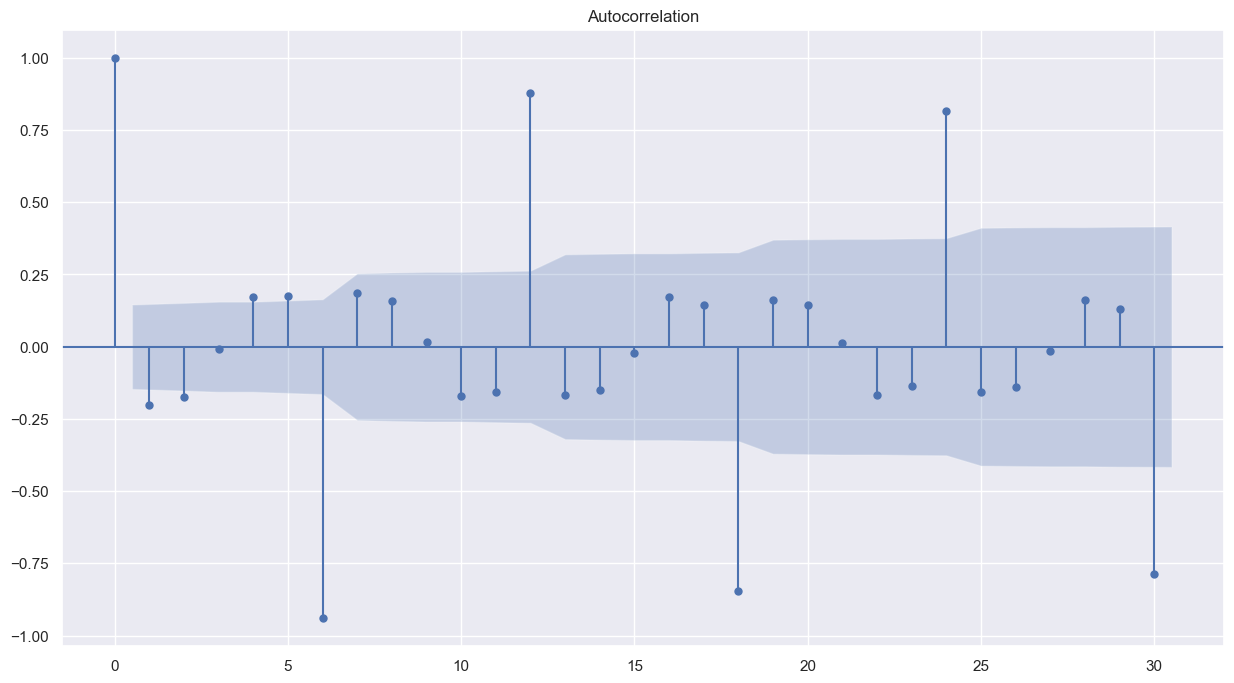

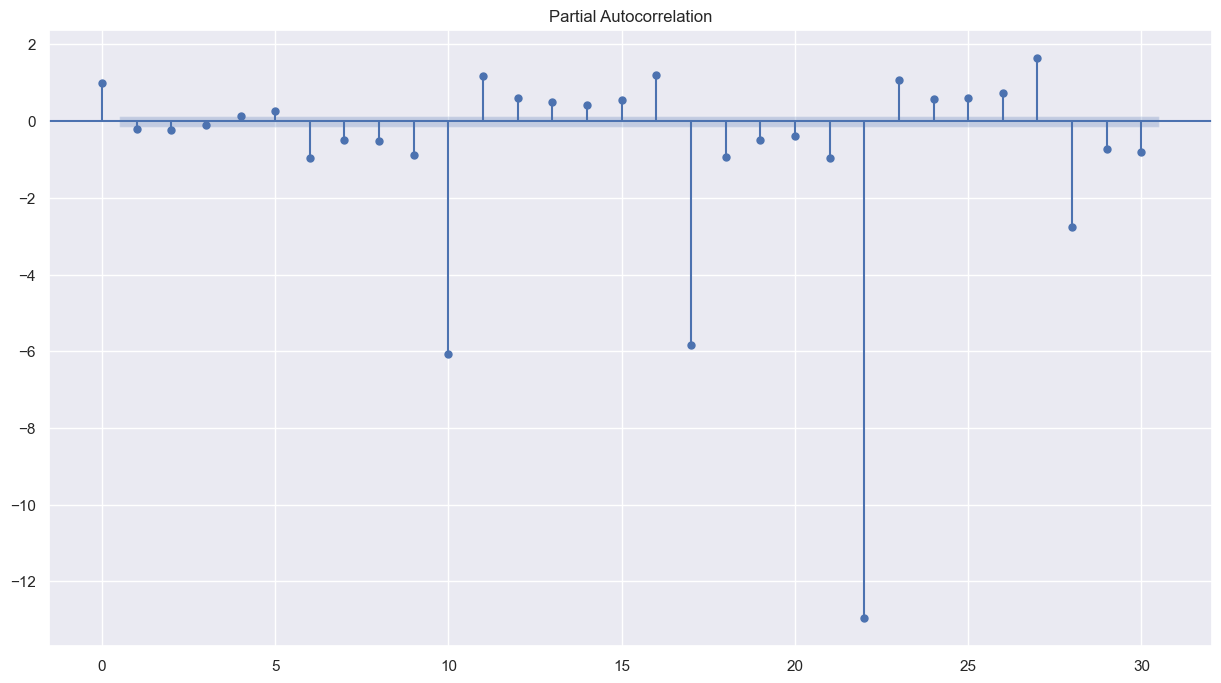

In [302]:
plot_acf((spdf["Sparkling"].diff(6).dropna()).diff(1).dropna(), lags=30)
plot_pacf((spdf["Sparkling"].diff(6).dropna()).diff(1).dropna(), lags=30)
plt.show()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(0) and q(0) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2. 

In [303]:
manual_SARIMA_6 = SARIMAX(train["Sparkling"],
                         order=(2,1,2),
                         seasonal_order=(2,1,2,6),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
display(results_manual_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Sparkling   No. Observations:                  130
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -796.955
Date:                           Fri, 13 Aug 2021   AIC                           1611.910
Time:                                   03:59:29   BIC                           1636.050
Sample:                               01-31-1980   HQIC                          1621.698
                                    - 10-31-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6558      0.261     -2.508      0.012      -1.168      -0.143
ar.L2         -0.0535      0.150     -0.357      0.721      -0.348       0.241
ma.L1         -0.1388      0.234     -0.594      0.553      -0.597       0.319
ma.L2         -0.7408      0.236     -3.142      0.002      -1.203      -0.279
ar.S.L6       -1.0995      0.214     -5.146      0.000      -1.518      -0.681
ar.S.L12      -0.0758      0.221     -0.342      0.732      -0.509       0.358
ma.S.L6        0.2063      0.224      0.921      0.357      -0.233       0.645
ma.S.L12      -0.5695      0.096     -5.933      0.000      -0.758      -0.381
sigma2      1.476e+05   2.18e+04      6.766      0.000    1.05e+05     1.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.41
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.36
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [304]:
manual_SARIMA_12 = SARIMAX(train["Sparkling"],
                         order=(2,1,2),
                         seasonal_order=(2,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
display(results_manual_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  130
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -668.833
Date:                            Fri, 13 Aug 2021   AIC                           1355.665
Time:                                    03:59:34   BIC                           1378.163
Sample:                                01-31-1980   HQIC                          1364.738
                                     - 10-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5699      0.276     -2.063      0.039      -1.111      -0.029
ar.L2          0.0136      0.147      0.092      0.926      -0.275       0.302
ma.L1         -0.1961      0.314     -0.624      0.532      -0.812       0.419
ma.L2         -0.8039      0.256     -3.139      0.002      -1.306      -0.302
ar.S.L12      -0.2824      0.472     -0.599      0.549      -1.206       0.642
ar.S.L24      -0.2641      0.218     -1.209      0.227      -0.692       0.164
ma.S.L12      -0.1330      0.475     -0.280      0.779      -1.064       0.798
ma.S.L24       0.1185      0.344      0.344      0.731      -0.556       0.793
sigma2       1.62e+05   1.66e-06   9.78e+10      0.000    1.62e+05    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.53
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               0.89   Skew:                             0.50
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+28. Standard errors may be unstable.
"""

## Prediction on the Test Set and Evaluation

In [305]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head())


rmse_manualsarima6 = rmse(test["Sparkling"], predicted_manual_SARIMA_6.predicted_mean)
display(rmse_manualsarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima6]}, index=["SARIMA(2,1,2)(2,1,2,6)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])


predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head())


rmse_manualsarima12 = rmse(test["Sparkling"], predicted_manual_SARIMA_12.predicted_mean)
display(rmse_manualsarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima12]}, index=["SARIMA(2,1,2)(2,1,2,12)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-11-30  4612.043085  384.338836    3858.752809    5365.333361
1990-12-31  6974.709939  392.363178    6205.692242    7743.727636
1991-01-31  1589.368191  393.230060     818.651436    2360.084947
1991-02-28  1229.949440  397.635813     450.597567    2009.301313
1991-03-31  1886.117929  397.730365    1106.580738    2665.655120

596.602075924135

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-11-30  4531.666681  404.548818    3738.765569    5324.567794
1990-12-31  7018.733806  416.400279    6202.604255    7834.863357
1991-01-31  1800.710746  418.633086     980.204974    2621.216517
1991-02-28  1545.417549  419.938817     722.352591    2368.482507
1991-03-31  2018.328902  420.092899    1194.961950    2841.695855

486.39673376214637

# Build table with all the above models with RMSE scores

In [326]:
display(resultsDf.sort_values(by=["Test RMSE"],ascending=True))

Test RMSE
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
SARIMA(2,1,2)(2,1,2,12)                              486.396734
SARIMA(2,1,2)(2,1,2,6)                               596.602076
SARIMA(1,1,2)(2,0,2,12)                              712.748401
2_point_trailing_Moving_Average                      811.178937
SARIMA(1,1,2)(2,0,2,6)                               871.032024
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Manual ARIMA(3,1,2)                                 1363.340999
ARIMA(2,1,2)                                        1364.201025
SimpleAverageModel                                  1368.746717
RegressionOnTime                                    1392.438305
9_point_trailing_Moving_Average                     1422.653281
NaiveModel                                          1496.444629
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

## Build most optimum model on the Full Data

In [308]:
full_data_model = SARIMAX(spdf["Sparkling"], order=(2,1,2), seasonal_order=(2,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
display(results_full_data_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1085.726
Date:                            Fri, 13 Aug 2021   AIC                           2189.453
Time:                                    04:03:34   BIC                           2216.367
Sample:                                01-31-1980   HQIC                          2200.388
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6655      0.275     -2.421      0.015      -1.204      -0.127
ar.L2         -0.0111      0.113     -0.099      0.921      -0.232       0.210
ma.L1         -0.1696      0.260     -0.652      0.515      -0.680       0.340
ma.L2         -0.7336      0.242     -3.032      0.002      -1.208      -0.259
ar.S.L12       0.0659      0.370      0.178      0.859      -0.659       0.791
ar.S.L24       0.2880      0.140      2.060      0.039       0.014       0.562
ma.S.L12      -0.7496      0.997     -0.752      0.452      -2.704       1.205
ma.S.L24      -0.2228      0.327     -0.682      0.495      -0.863       0.418
sigma2      1.332e+05   9.92e+04      1.343      0.179   -6.12e+04    3.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.11
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.56
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Use optimal model with lowest RMSE to predict 12 months into future with a plot and confidence intervals

In [323]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

display(predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head())

rmse_full_data = rmse(spdf["Sparkling"], results_full_data_model.fittedvalues)
display(rmse_full_data)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  2132.780768  373.933432    1399.884708    2865.676827
1995-09-30  2359.398551  379.074187    1616.426797    3102.370304
1995-10-31  3266.883405  379.149499    2523.764043    4010.002767
1995-11-30  4040.248353  381.486093    3292.549350    4787.947357
1995-12-31  6101.118514  381.593258    5353.209472    6849.027556

568.7905079219146

In [324]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start="1995-08-31", end="1996-07-31", freq="M"))

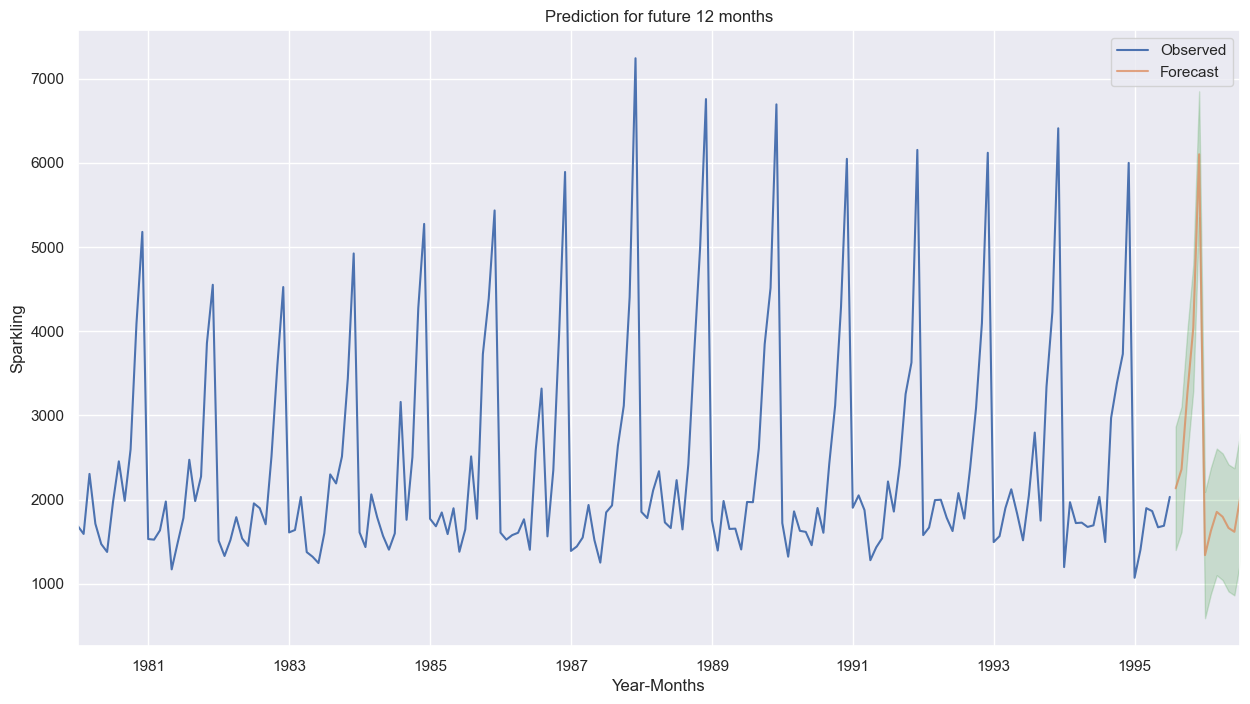

In [325]:
axis = spdf["Sparkling"].plot(label="Observed")

pred_full_manual_SARIMA_data["mean"].plot(ax=axis, label="Forecast", alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_data.index,
                 pred_full_manual_SARIMA_data["mean_ci_lower"],
                 pred_full_manual_SARIMA_data["mean_ci_upper"],
                 color="green",
                 alpha=0.15)

axis.set_xlabel("Year-Months")
axis.set_ylabel("Sparkling")
plt.title("Prediction for future 12 months")
plt.legend(loc="best")
plt.show()
